<a href="https://colab.research.google.com/github/Boat2356/EDA_ThaiRoadAccident2022/blob/main/EDA_RoadAccident2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ทำการโหลดไฟล์ จาก  Google drive ลงมาที่ current directory
!gdown --id 1KWDXNoEhiDXFz3fFMqIC0RPJUmV_GpTw

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KWDXNoEhiDXFz3fFMqIC0RPJUmV_GpTw
To: /content/accident2022.zip
100% 4.17M/4.17M [00:00<00:00, 144MB/s]


In [2]:
# ทำการ unzip file จะได้ตัว file excel ออกมา
!unzip accident2022.zip

Archive:  accident2022.zip
  inflating: accident2022.xlsx       


In [3]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf #install font thaisarabun

--2024-04-07 19:36:27--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-04-07 19:36:27--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2024-04-07 19:36:28 (6.11 MB/s) - ‘t

In [4]:
import matplotlib as mpl
import matplotlib.font_manager

mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')



> **Import Library**


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import calendar
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools

# 1.Data transformation / Cleaning data

In [6]:
Accidents = pd.read_excel('accident2022.xlsx') #read data
Accidents

,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,รหัสสายทาง,สายทาง,ก.ม.,...,รถบรรทุก 6 ล้อ,รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ,รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง),รถอีแต๋น,อื่นๆ,คนเดินเท้า,จำนวนผู้เสียชีวิต,จำนวนผู้บาดเจ็บสาหัส,จำนวนผู้บาดเจ็บเล็กน้อย,รวมจำนวนผู้บาดเจ็บ
0,2022,2022-01-01,00:01:00,2022-01-02,11:45:00,6566872,กรมทางหลวงชนบท,ชน.5016,เทศบาลตำบลวัดสิงห์ - บ้านน้ำพุ (ช่วงหันคา),17.430,...,0,0,0,0,0,0,0,1,0,1
1,2022,2022-01-01,00:01:00,2022-01-02,11:44:00,6566880,กรมทางหลวงชนบท,มค.4012,แยกทางหลวงหมายเลข 2152 (กม.ที่ 31+700) - บ้านก...,0.500,...,0,0,0,0,0,0,0,0,1,1
2,2022,2022-01-01,00:03:00,2022-02-09,08:41:00,5706553,กรมทางหลวง,4,พ่อตาหินช้าง - วังครก,469.800,...,0,0,0,0,0,0,1,0,0,0
3,2022,2022-01-01,00:05:00,2022-01-02,06:21:00,5485750,กรมทางหลวง,4030,ถลาง - หาดราไวย์,17.125,...,0,0,0,0,0,0,0,0,1,1
4,2022,2022-01-01,00:05:00,2022-01-24,09:59:00,5624452,กรมทางหลวง,216,ถนนวงแหวนรอบเมืองอุดรธานีด้านทิศตะวันออก,25.350,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21027,2022,2022-12-31,23:11:00,2023-01-01,21:49:00,7534454,กรมทางหลวง,306,แคราย - คลองบ้านใหม่,16.780,...,0,0,0,0,0,0,1,0,0,0
21028,2022,2022-12-31,23:30:00,2023-01-01,22:55:00,7534701,กรมทางหลวง,3148,ตราด - แหลมงอบ,16.800,...,0,0,0,0,0,0,1,0,0,0
21029,2022,2022-12-31,23:30:00,2023-01-23,09:17:00,7567022,กรมทางหลวง,2040,วาปีปทุม - พยัคฆภูมิพิสัย,64.250,...,0,0,0,0,0,0,0,0,3,3
21030,2022,2022-12-31,23:45:00,2023-01-01,05:36:00,7531271,กรมทางหลวง,1116,นครชุม - มอเจริญ,9.515,...,0,0,0,0,0,0,1,0,0,0


In [7]:
Accidents.columns # check columns

Index(['ปีที่เกิดเหตุ', 'วันที่เกิดเหตุ', 'เวลา', 'วันที่รายงาน',
       'เวลาที่รายงาน', 'ACC_CODE', 'หน่วยงาน', 'รหัสสายทาง', 'สายทาง', 'ก.ม.',
       'จังหวัด', 'รถคันที่ 1', 'บริเวณที่เกิดเหตุ/ลักษณะทาง',
       'มูลเหตุสันนิษฐาน', 'ลักษณะการเกิดอุบัติเหตุ', 'สภาพอากาศ', 'LATITUDE',
       'LONGITUDE', 'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)',
       'จำนวนที่เกิดเหตุทั้งหมด (รวมคนเดินเท้า)', 'รถจักรยานยนต์',
       'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ', 'รถตู้',
       'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า 4 ล้อ', 'รถปิคอัพบรรทุก 4 ล้อ',
       'รถบรรทุก 6 ล้อ', 'รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ',
       'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)', 'รถอีแต๋น', 'อื่นๆ', 'คนเดินเท้า',
       'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย',
       'รวมจำนวนผู้บาดเจ็บ'],
      dtype='object')

In [8]:
# Rename each columns
Mapping = {
    'ปีที่เกิดเหตุ' : 'Year',
    'วันที่เกิดเหตุ' : 'Date',
    'เวลา' : 'Time',
    'วันที่รายงาน' : 'DateReport',
    'เวลาที่รายงาน' : 'TimeReport',
    'ACC_CODE' : 'Acc',
    'หน่วยงาน' : 'Agency',
    'รหัสสายทาง' : 'RouteCode',
    'สายทาง' : 'Route',
    'ก.ม.' : 'Km',
    'จังหวัด' : 'Province',
    'รถคันที่ 1' : 'FirstCar',
    'บริเวณที่เกิดเหตุ/ลักษณะทาง' : 'RoadType',
    'มูลเหตุสันนิษฐาน' : 'Cause',
    'ลักษณะการเกิดอุบัติเหตุ' : 'AccidentType',
    'สภาพอากาศ' : 'Weather',
    'LATITUDE' : 'Lat',
    'LONGITUDE' : 'Long',
    'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)' : 'NumOfCar_Include_firstCar',
    'จำนวนที่เกิดเหตุทั้งหมด (รวมคนเดินเท้า)' : 'NumOfAccident_Include_pedestrian',
    'รถจักรยานยนต์' : 'Motorcycle',
    'รถสามล้อเครื่อง' : 'tricycle',
    'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ' : 'Public_Cars',
    'รถตู้' : 'Van',
    'รถปิคอัพโดยสาร' : 'Passenger_pickup_truck',
    'รถโดยสารมากกว่า 4 ล้อ' : 'Bus_LessThan4wheels',
    'รถปิคอัพบรรทุก 4 ล้อ' : 'PickupTruck_4wheels',
    'รถบรรทุก 6 ล้อ' : 'Truck_6wheels',
    'รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ' : 'Truck_LessThan10wheels',
    'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)' : 'Truck_MoreThan10wheels',
    'รถอีแต๋น' : 'Etan_car',
    'อื่นๆ' : 'Else',
    'คนเดินเท้า' : 'Pedestrians',
    'จำนวนผู้เสียชีวิต' : 'Dead',
    'จำนวนผู้บาดเจ็บสาหัส' : 'Seriously_injured',
    'จำนวนผู้บาดเจ็บเล็กน้อย' : 'Minor_Injured',
    'รวมจำนวนผู้บาดเจ็บ'  : 'Total_Injured'
}
Accidents.rename(index=str, columns=Mapping, inplace=True)
Accidents

,Year,Date,Time,DateReport,TimeReport,Acc,Agency,RouteCode,Route,Km,...,Truck_6wheels,Truck_LessThan10wheels,Truck_MoreThan10wheels,Etan_car,Else,Pedestrians,Dead,Seriously_injured,Minor_Injured,Total_Injured
0,2022,2022-01-01,00:01:00,2022-01-02,11:45:00,6566872,กรมทางหลวงชนบท,ชน.5016,เทศบาลตำบลวัดสิงห์ - บ้านน้ำพุ (ช่วงหันคา),17.430,...,0,0,0,0,0,0,0,1,0,1
1,2022,2022-01-01,00:01:00,2022-01-02,11:44:00,6566880,กรมทางหลวงชนบท,มค.4012,แยกทางหลวงหมายเลข 2152 (กม.ที่ 31+700) - บ้านก...,0.500,...,0,0,0,0,0,0,0,0,1,1
2,2022,2022-01-01,00:03:00,2022-02-09,08:41:00,5706553,กรมทางหลวง,4,พ่อตาหินช้าง - วังครก,469.800,...,0,0,0,0,0,0,1,0,0,0
3,2022,2022-01-01,00:05:00,2022-01-02,06:21:00,5485750,กรมทางหลวง,4030,ถลาง - หาดราไวย์,17.125,...,0,0,0,0,0,0,0,0,1,1
4,2022,2022-01-01,00:05:00,2022-01-24,09:59:00,5624452,กรมทางหลวง,216,ถนนวงแหวนรอบเมืองอุดรธานีด้านทิศตะวันออก,25.350,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21027,2022,2022-12-31,23:11:00,2023-01-01,21:49:00,7534454,กรมทางหลวง,306,แคราย - คลองบ้านใหม่,16.780,...,0,0,0,0,0,0,1,0,0,0
21028,2022,2022-12-31,23:30:00,2023-01-01,22:55:00,7534701,กรมทางหลวง,3148,ตราด - แหลมงอบ,16.800,...,0,0,0,0,0,0,1,0,0,0
21029,2022,2022-12-31,23:30:00,2023-01-23,09:17:00,7567022,กรมทางหลวง,2040,วาปีปทุม - พยัคฆภูมิพิสัย,64.250,...,0,0,0,0,0,0,0,0,3,3
21030,2022,2022-12-31,23:45:00,2023-01-01,05:36:00,7531271,กรมทางหลวง,1116,นครชุม - มอเจริญ,9.515,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# Delete column ที่ไม่ต้องการ
Accidents.drop(['Year'],axis=1,inplace = True)
Accidents.drop(['Acc'],axis=1,inplace = True)
Accidents.drop(['RouteCode'],axis=1,inplace = True)
Accidents.drop(['Route'],axis=1,inplace = True)
Accidents.drop(['Km'],axis=1,inplace = True)
Accidents.drop(['Lat'],axis=1,inplace = True)
Accidents.drop(['Long'],axis=1,inplace = True)
Accidents.drop(['DateReport'],axis=1,inplace = True)
Accidents.drop(['TimeReport'],axis=1,inplace = True)
Accidents

,Date,Time,Agency,Province,FirstCar,RoadType,Cause,AccidentType,Weather,NumOfCar_Include_firstCar,...,Truck_6wheels,Truck_LessThan10wheels,Truck_MoreThan10wheels,Etan_car,Else,Pedestrians,Dead,Seriously_injured,Minor_Injured,Total_Injured
0,2022-01-01,00:01:00,กรมทางหลวงชนบท,ชัยนาท,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน,เมาสุรา,NaN,แจ่มใส,1,...,0,0,0,0,0,0,0,1,0,1
1,2022-01-01,00:01:00,กรมทางหลวงชนบท,มหาสารคาม,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน,ใช้โทรศัพท์เคลื่อนที่ขณะขับรถ,NaN,มืดครึ้ม,1,...,0,0,0,0,0,0,0,0,1,1
2,2022-01-01,00:03:00,กรมทางหลวง,ชุมพร,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง+ไม่มีความลาดชัน,ขับรถเร็วเกินอัตรากำหนด,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,1,...,0,0,0,0,0,0,1,0,0,0
3,2022-01-01,00:05:00,กรมทางหลวง,ภูเก็ต,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน,เมาสุรา,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,1,...,0,0,0,0,0,0,0,0,1,1
4,2022-01-01,00:05:00,กรมทางหลวง,อุดรธานี,รถปิคอัพบรรทุก 4 ล้อ,ทางตรง+ไม่มีความลาดชัน,ขับรถเร็วเกินอัตรากำหนด,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,1,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21027,2022-12-31,23:11:00,กรมทางหลวง,นนทบุรี,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน,ขับรถเร็วเกินอัตรากำหนด,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,1,...,0,0,0,0,0,0,1,0,0,0
21028,2022-12-31,23:30:00,กรมทางหลวง,ตราด,รถจักรยานยนต์,NaN,ขับรถเร็วเกินอัตรากำหนด,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,1,...,0,0,0,0,0,0,1,0,0,0
21029,2022-12-31,23:30:00,กรมทางหลวง,มหาสารคาม,รถตู้,ทางตรง+ไม่มีความลาดชัน,ขับรถเร็วเกินอัตรากำหนด,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,1,...,0,0,0,0,0,0,0,0,3,3
21030,2022-12-31,23:45:00,กรมทางหลวง,กำแพงเพชร,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน,เมาสุรา,พลิกคว่ำ/ตกถนนในทางตรง,แจ่มใส,1,...,0,0,0,0,0,0,1,0,0,0


In [10]:
Accidents.columns

Index(['Date', 'Time', 'Agency', 'Province', 'FirstCar', 'RoadType', 'Cause',
       'AccidentType', 'Weather', 'NumOfCar_Include_firstCar',
       'NumOfAccident_Include_pedestrian', 'Motorcycle', 'tricycle',
       'Public_Cars', 'Van', 'Passenger_pickup_truck', 'Bus_LessThan4wheels',
       'PickupTruck_4wheels', 'Truck_6wheels', 'Truck_LessThan10wheels',
       'Truck_MoreThan10wheels', 'Etan_car', 'Else', 'Pedestrians', 'Dead',
       'Seriously_injured', 'Minor_Injured', 'Total_Injured'],
      dtype='object')

In [11]:
#เช็คค่าความถี่ของข้อมูลที่ขาดหาย Big-O -> O(n)
def missing_data(data): # check Nan value >>> NaN คือ ข้อมูลว่างหรือขาดหาย
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])

missing_data(Accidents) # เช่น RoadType มีค่า NaN value ทั้งหมด 2312 คิดเป็น % ได้ 2312 / 21031 * 100 = 10.99

,Total NaN Values,Percentage of NaN Values
RoadType,2312,10.992773
AccidentType,1158,5.505896
Cause,694,3.299734
FirstCar,479,2.277482
Weather,59,0.280525
Province,6,0.028528
Pedestrians,0,0.000000
Truck_LessThan10wheels,0,0.000000
Truck_MoreThan10wheels,0,0.000000
Etan_car,0,0.000000


In [12]:
# ลบแถว (row) ที่มีค่า NaN ออกไปในกรณีที่มีค่าใดค่าหนึ่งใน row นั้นมีค่าเป็น NaN
Accidents.dropna(inplace=True)
# inplace=True คือ ทำให้เมธอดนี้เป็นการเปลี่ยนแปลงแทนที่ DataFrame ตัวเก่าด้วยตัวที่ลบ NaN ออกไปแล้วทันที
missing_data(Accidents)

,Total NaN Values,Percentage of NaN Values
Date,0,0.0
Time,0,0.0
Minor_Injured,0,0.0
Seriously_injured,0,0.0
Dead,0,0.0
Pedestrians,0,0.0
Else,0,0.0
Etan_car,0,0.0
Truck_MoreThan10wheels,0,0.0
Truck_LessThan10wheels,0,0.0


In [13]:
# แยก Date ออกมาเป็น Day/Month/Year
Accidents['Date'] = pd.to_datetime(Accidents.Date)
Accidents['year'] = Accidents['Date'].dt.year
Accidents['month'] = Accidents['Date'].dt.month
Accidents['day'] = Accidents['Date'].dt.day

Accidents[['day','month','year']]

,day,month,year
2,1,1,2022
3,1,1,2022
4,1,1,2022
6,1,1,2022
7,1,1,2022
...,...,...,...
21023,31,12,2022
21027,31,12,2022
21029,31,12,2022
21030,31,12,2022


In [14]:
# แปลง Datatype ของ column Time (object) >>> Time (datetime64[ns])
t2 = Accidents['Time'].astype(str)
Accidents['Time'] = pd.to_datetime(t2,format='%H:%M:%S')

# แยก Time ออกมาเป็น Hour:Minute:Second
Accidents['Time'] = pd.to_datetime(Accidents.Time)
Accidents['hour'] = Accidents['Time'].dt.hour
Accidents['minute'] = Accidents['Time'].dt.minute
Accidents['second'] = Accidents['Time'].dt.second

Accidents[['hour','minute','second']]

,hour,minute,second
2,0,3,0
3,0,5,0
4,0,5,0
6,0,8,0
7,0,10,0
...,...,...,...
21023,22,55,0
21027,23,11,0
21029,23,30,0
21030,23,45,0


# 2.Data analysis / Visualization

**เดือนใดมีความถี่การเกิดอุบัติเหตุมากที่สุดและน้อยที่สุดและมีค่าเฉลี่ยเท่าใด ?**


In [15]:
# Convert Month number -> Month name
Month_idx = Accidents.groupby(['month'])[['month']].count().index.tolist() #เก็บ index เดือน [0,1,2,...,12]
Month_value = Accidents.groupby(['month'])[['month']].count().values.tolist() #เก็บความถี่แต่ละเดือน
Month_name = [calendar.month_name[x] for x in Month_idx] #

#นําข้อมูลจากข้างบนมาใส่ DataFrame แล้วแสดงผล
df_MonthPerCount = pd.DataFrame({'Month': Month_name, 'Count': Month_value})
df_MonthPerCount = df_MonthPerCount.set_index(['Month'])
df_MonthPerCount['Count'] = df_MonthPerCount['Count'].apply(lambda x: x[0])
#df_MonthPerCount = df_MonthPerCount.reset_index()
# Display result

print("ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , df_MonthPerCount['Count'].max())
print("ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , df_MonthPerCount['Count'].min())
print("ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = {0:.2f}" .format(df_MonthPerCount['Count'].sum() / len(df_MonthPerCount['Count'])))
df_MonthPerCount


ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  1993
ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  1183
ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = 1403.83


,Count
Month,
January,1897
February,1221
March,1284
April,1993
May,1348
June,1183
July,1363
August,1279
September,1224


In [16]:
#overall time complexity is O(nlogn)
def create_bar_data(col, df): # parameter 2 ตัว คือ column ที่ต้องการและ DataFrame
    aggregated = df[col].value_counts().sort_values(ascending=True)
    x_values = aggregated.index.tolist() #เก็บ index ไว้เป็น list
    y_values = aggregated.values.tolist() #เก็บ values ไว้เป็น list
    return x_values, y_values


x2, y2 = create_bar_data('month', Accidents)
xn = [calendar.month_name[int(x)] for x in (x2)] #เปลี่ยน month number -> month name
vn = y2
print(xn,vn)
colors = ['#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476', '#a1d99b', '#c7e9c0']
trace1 = go.Bar(x=xn, y=vn, opacity=0.75, name="month",text = vn, marker=dict(color=colors))
layout = dict(height=400, title='Number of Accidents per Month',xaxis = dict(title = 'Months'), yaxis = dict(title = 'Number of Accidents'));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='stacked-bar')

['June', 'November', 'February', 'September', 'August', 'March', 'October', 'May', 'July', 'December', 'January', 'April'] [1183, 1218, 1221, 1224, 1279, 1284, 1300, 1348, 1363, 1536, 1897, 1993]


*   เดือนเมษายนคือเดือนที่มีความถี่ของการเกิดอุบัติเหตุมากที่สุด รองลงมาคือเดือนมกราคม และเดือนธันวาคม โดยมีความถี่คือ 1993,1897 และ 1536
*   ขณะที่เดือนมิถุนายนมีความถี่ของการเกิดอุบัติเหตุน้อยที่สุด โดยมีความถี่เป็น 1183
*   ค่าเฉลี่ยของความถี่ในการเกิดอุบัติเหตุแต่ละเดือนเป็น 1403.83







**วันไหนของเดือนที่มีความถี่การเกิดอุบัติเหตุมากที่สุดและน้อยที่สุดและมีค่าเฉลี่ยเท่าใด ?**

In [17]:
day_count = Accidents.groupby(['day'])[['day']].count()
print("ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["day"]].value_counts().max())
print("ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["day"]].value_counts().min())
print("ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = {0:.2f}" .format(Accidents[["day"]].value_counts().sum()
 / len(Accidents[["day"]].value_counts())))
day_count.T #Transpose


ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  733
ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  404
ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = 543.42


day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
day,733,658,615,544,475,404,524,512,493,534,...,458,463,472,500,485,463,529,607,618,430


In [18]:
x_day, y_day = create_bar_data('day', Accidents) #x_day contains month name, y_day contains frequency each month
#print(x_day,y_day)
xn_day = x_day
yn_day = y_day
colors = ['#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2',
          '#31a354', '#74c476', '#a1d99b', '#c7e9c0', '#756bb1', '#9e9ac8', '#bcbddc', '#dadaeb',
          '#636363', '#969696', '#bdbdbd', '#d9d9d9', '#e7e7e7', '#8c6d31', '#bd9e39', '#e7ba52',
          '#f4c471', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194', '#ce6dbd']
trace2 = go.Bar(x=xn_day, y=yn_day, opacity=0.75,text=yn_day, marker=dict(color=colors),name="day")
layout2 = dict(width = 1500,height=400, title='Number of Accidents per Day',
              xaxis = dict(title = 'Days'),yaxis = dict(title = 'Number of Accidents'));
fig2 = go.Figure(data=[trace2], layout=layout2)
iplot(fig2,filename='stacked-bar') #filename='stacked-bar'

*   วันที่ 1 ของทุกเดือนมีความถี่ในการเกิดอุบัติเหตุมากที่สุด รองลงมาเป็นวันที่ 2 และ 13 โดยมีความถี่เป็น 733, 658 และ 620 ตามลําดับ
*   วันที่ 6 ของทุกเดือนมีความถี่ในการเกิดอุบัติเหตุน้อยที่สุด โดยมีความถี่เป็น 404
*   ค่าเฉลี่ยของความถี่ในการเกิดอุบัติเหตุแต่ละวันของทุกเดือนเป็น 543.42




**เวลาที่ชั่วโมงใดมีความถี่ในการเกิดอุบัติเหตุมากที่สุดและน้อยที่สุดและค่าเฉลี่ยเป็นเท่าใด ?**

In [19]:
hourly_counts = Accidents.groupby(['hour'])[['hour']].count() #สามารถใช้ groupby ไว้จัดหมวดหมู่ได้
print("ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["hour"]].value_counts().max())
print("ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["hour"]].value_counts().min())
print("ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = {0:.2f}" .format(Accidents[["hour"]].value_counts().sum() /
                                                               len(Accidents[["hour"]].value_counts())))
hourly_counts.T

ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  974
ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  482
ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = 701.92


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
hour,550,624,527,482,503,557,550,689,716,774,...,898,974,931,808,709,789,685,611,572,611


In [20]:
dates = Accidents['hour']
aggregated = dates.value_counts().sort_index()
x_values = aggregated.index.tolist() #contains hour (1-24)
y_values = aggregated.values.tolist() #contains frequency each hour
x1,y1 = x_values, y_values
trace1 = go.Scatter(x=x1, y=y1, mode='lines+markers', opacity=0.75, name="Hour", line=dict(width=2))
layout = dict(height=400, title='Frequency of Accidents per Day', xaxis=dict(title='Hour'), yaxis=dict(title='Number of Accidents'))
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig, filename='line-graph')


*   ดูจากแนวโน้มของเส้นกราฟสังเกตได้ว่าเวลา 15  นาฬิกามีความถี่ของจํานวนการเกิดอุบัติเหตุมากที่สุด โดยมีความถี่เป็น 974
*   ช่วงเวลา 3 นาฬิกามีความถี่ของจํานวนการเกิดอุบัติเหตุน้อยที่สุด โดยมีความถี่เป็น 482



**จังหวัดใดมีความถี่การเกิดอุบัติเหตุมากที่สุด 5 อันดับแรก ?**

In [21]:
Province_idx = Accidents.groupby(['Province'])[['Province']].count().index.tolist()
Province_values = Accidents.groupby(['Province'])[['Province']].count().values.tolist()

# combine the two lists
Province_list = list(zip(Province_idx, Province_values)) #--> [(กรุงเทพ,1333),(ชลบุรี,1056)]
#print(Province_list)
# sort the list in descending order by Province_values
Province_list_sorted = sorted(Province_list, key=lambda x: x[1][0], reverse=True)

# separate the sorted lists back into Province_idx and Province_values
Province_idx_sorted = [x[0] for x in Province_list_sorted] #เก็บ index จังหวัด
Province_values_sorted = [x[1] for x in Province_list_sorted] #เก็บ value แต่ละจังหวัด

# display result
#print(Province_idx_sorted)
#print(Province_values_sorted)

df_pv = pd.DataFrame({"Province_IDX" : Province_idx_sorted,
                                  "Provice_value" : Province_values_sorted})

df_pv = df_pv.set_index(['Province_IDX'])
df_pv['Provice_value'] = df_pv['Provice_value'].apply(lambda x: x[0])
df_pv.head(5)

,Provice_value
Province_IDX,
กรุงเทพมหานคร,1332
ชลบุรี,1056
นครราชสีมา,762
เชียงใหม่,639
สุพรรณบุรี,494


In [22]:
print("ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["Province"]].value_counts().max())
print("ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["Province"]].value_counts().min())
print("ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = {0:.2f}" .format(Accidents[["Province"]].value_counts().sum() / len(Accidents[["Province"]].value_counts())))

ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  1332
ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  35
ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = 218.78


In [23]:
x1, y1 = create_bar_data('Province', Accidents)
trace1 = go.Bar(x=y1, y=x1, opacity=0.75, name="Province", marker=dict(color='#9ecae1'),orientation='h',text = y1)
layout = dict(height=2000, title='Accidents by Provinces');
fig = go.Figure(data=[trace1], layout=layout)
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'}) # เรียงจากมากไปน้อยจากบนลงล่าง
iplot(fig, filename='stacked-bar')



*   จังหวัดที่มีความถี่ในการเกิดอุบัติเหตุมากที่สุด 5 อันดับแรก คือ 1. กรุงเทพมหานคร 2.ชลบุรี 3.นครราชสีมา 4.เชียงใหม่ และ 5.สุพรรณบุรี โดยมีความถี่เป็น 1332, 1056 762 639 และ 494 ตามลําดับ




**ถนนหรือทางแบบใดที่มีความถี่ในการเกิดอุบัติเหตุมากที่สุด 3 อันดับแรก?**




In [24]:
RoadType_idx = Accidents.groupby(['RoadType'])[['RoadType']].count().index.tolist()
RoadType_values = Accidents.groupby(['RoadType'])[['RoadType']].count().values.tolist()
RoadType_list = list(zip(RoadType_idx, RoadType_values))
# sort the list in descending order by Province_values
RoadType_list_sorted = sorted(RoadType_list, key=lambda x: x[1][0], reverse=True)
# separate the sorted lists back into Province_idx and Province_values
RoadType_idx_sorted = [x[0] for x in RoadType_list_sorted] #เก็บประเภทของถนน
RoadType_values_sorted = [x[1] for x in RoadType_list_sorted] #เก็บความถี่ตามประเภทถนน
df_Rt = pd.DataFrame({"RoadType_IDX" : RoadType_idx_sorted,
                                  "RoadType_value" : RoadType_values_sorted})
df_Rt = df_Rt.set_index(['RoadType_IDX'])
df_Rt['RoadType_value'] = df_Rt['RoadType_value'].apply(lambda x: x[0])
df_Rt.head(3)

,RoadType_value
RoadType_IDX,
ทางตรง+ไม่มีความลาดชัน,13503
ทางโค้งกว้าง+ไม่มีความลาดชัน,1974
ทางโค้งกว้าง+ที่ลาดชัน,805


In [25]:
print("ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["RoadType"]].value_counts().max())
print("ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["RoadType"]].value_counts().min())
print("ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = {0:.2f}" .format(Accidents[["RoadType"]].value_counts().sum() / len(Accidents[["RoadType"]].value_counts())))

ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  13503
ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  1
ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = 1203.29


In [26]:
x_road, y_road = create_bar_data('RoadType', Accidents)
trace2 = go.Bar(x = y_road, y = x_road, opacity = 0.75, marker=dict(color='#ff00ff'),
                name = "RoadType",orientation='h',text = y_road)
layout = dict(height=1000, title='Accidents by Type of Road');
fig = go.Figure(data=[trace2], layout=layout)
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
iplot(fig, filename='stacked-bar')

 *   จากกราฟจะเห็นว่าถนนหรือทางที่มีความถี่ในการเกิดอุบัติเหตุมากที่สุด 3 อันดับแรกได้แก่ 1.ทางตรง+ไม่มีความลาดชัน 2.ทางโค้งกว้าง+ไม่มีความลาดชัน
และ 3.ทางโค้งกว้าง+ที่ลาดชัน โดยมีความุุถี่เป็น 13503, 1974 และ 805 ตามลําดับ






**ลักษณะการเกิดอุบัติแบบใดที่มีจํานวนการเกิดอุบัติเหตุมากที่สุด 3 อันดับแรก ?**

In [27]:
AccidentType_idx = Accidents.groupby(['AccidentType'])[['AccidentType']].count().index.tolist()
AccidentType_values = Accidents.groupby(['AccidentType'])[['AccidentType']].count().values.tolist()
AccidentType_list = list(zip(AccidentType_idx, AccidentType_values))
AccidentType_list_sorted = sorted(AccidentType_list, key=lambda x: x[1][0], reverse=True)

AccidentType_idx_sorted = [x[0] for x in AccidentType_list_sorted] #เก็บลักษณะการเกิดอุบัติเหตุ
AccidentType_values_sorted = [x[1] for x in AccidentType_list_sorted] #เก็บความถี่ของลักษณะการเกิดอุบัติเหตุ

# display result
df_At = pd.DataFrame({"AccidentType_IDX" : AccidentType_idx_sorted,
                                  "AccidentType_value" : AccidentType_values_sorted})

df_At = df_At.set_index(['AccidentType_IDX'])
df_At['AccidentType_value'] = df_At['AccidentType_value'].apply(lambda x: x[0])
df_At.head(3)

,AccidentType_value
AccidentType_IDX,
พลิกคว่ำ/ตกถนนในทางตรง,7804
ชนท้าย,5205
พลิกคว่ำ/ตกถนนในทางโค้ง,2170


In [28]:
print(Accidents[["AccidentType"]].value_counts())
print("ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["AccidentType"]].value_counts().max())
print("ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น = " , Accidents[["AccidentType"]].value_counts().min())
print("ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = {0:.2f}" .format(Accidents[["AccidentType"]].value_counts().sum() / len(Accidents[["AccidentType"]].value_counts())))

AccidentType                       
พลิกคว่ำ/ตกถนนในทางตรง                 7804
ชนท้าย                                 5205
พลิกคว่ำ/ตกถนนในทางโค้ง                2170
ชนในทิศทางตรงกันข้าม (ไม่ใช่การแซง)     720
ชนสิ่งกีดขวาง (บนผิวจราจร)              486
อื่นๆ                                   255
ชนคนเดินเท้า                            169
ชนด้านข้าง                               28
ชนเป็นมุมบริเวณทางแยก                     5
เลี้ยว/ถอยชน                              3
ชนขณะแซง                                  1
Name: count, dtype: int64
ค่ามากที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  7804
ค่าน้อยที่สุดของจํานวนอุบัติเหตุที่เกิดขึ้น =  1
ค่าเฉลี่ยจํานวนอุบัติเหตุที่เกิดขึ้น = 1531.45


In [29]:
x3, y3 = create_bar_data('AccidentType', Accidents)
trace3 = go.Bar(x = y3, y = x3, opacity = 0.75, marker=dict(color='#fdae6b'),
                name = "AccidentType",orientation='h',text = y3)
layout = dict(height=1000, title='Accidents by Type of Accidents');
fig = go.Figure(data=[trace3], layout=layout)
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
iplot(fig, filename='stacked-bar')

 *   จากกราฟจะเห็นว่าถนนหรือทางที่มีความถี่ในการเกิดอุบัติเหตุมากที่สุด 3 อันดับแรกได้แก่ 1.พลิกคว่ำ/ตกถนนในทางตรง 2.ชนท้าย และ 3.พลิกคว่ำ/ตกถนนในทางโค้ง โดยมีความุุถี่เป็น 7804, 5205 และ 2170 ตามลําดับ


**เดือนใดที่มีจํานวนผู้เสียชีวิตและผู้บาดเจ็บรวมสูงที่สุด ?**

In [30]:
#Injury_Dead_index = Accidents.groupby(['month'])['Total_Injured'].sum().index.tolist() #เก็บเดือน
Injury_Dead_index = Accidents['month'].unique().tolist()
Injury_value = Accidents.groupby(['month'])['Total_Injured'].sum().values.tolist() #เก็บผลรวมของผู้บาดเจ็บ
Dead_value = Accidents.groupby(['month'])['Dead'].sum().values.tolist() #เก็บผลรวมของผู้เสียชีวิต

Months_name = [calendar.month_name[x] for x in Injury_Dead_index] # month number -> month name
#Months_name
df_Dead_Injury = pd.DataFrame({"Injury_Dead_IDX":Months_name,
                                                "Injury_value":Injury_value,
                                                "Dead_value":Dead_value})

df_Dead_Injury = df_Dead_Injury.set_index(['Injury_Dead_IDX'])
df_Dead_Injury

,Injury_value,Dead_value
Injury_Dead_IDX,,
January,1631,229
February,813,146
March,811,145
April,1705,277
May,937,166
June,751,120
July,1073,182
August,948,134
September,804,134


In [31]:
dead_by_month = {}
injury_by_month = {}

inj_per_month = Accidents.groupby(['month'])['Total_Injured'].sum().values.tolist() #เก็บ values ไว้เป็น list
inj_in_number = Accidents.groupby(['month'])['Total_Injured'].sum().index.tolist() #เก็บ index ไว้เป็น list

dead_per_month = Accidents.groupby(['month'])['Dead'].sum().values.tolist() #เก็บ values ไว้เป็น list
months_in_number = Accidents.groupby(['month'])['Dead'].sum().index.tolist() #เก็บ index ไว้เป็น list

for i in range(len(inj_in_number)):
    month_abbr = calendar.month_abbr[inj_in_number[i]] #เปลี่ยน month number -> month name
    if month_abbr in inj_per_month: # เช็คว่ามีเดือนอยู่ใน dictionary หรือไม่ ถ้าไม่มีให้เพิ่มค่า values นั้นลงไป
        injury_by_month[month_abbr] += inj_per_month[i]
    else:
        injury_by_month[month_abbr] = inj_per_month[i]


for i in range(len(months_in_number)):
    month_abbr = calendar.month_abbr[months_in_number[i]] #เปลี่ยน month number -> month name
    if month_abbr in dead_by_month: # เช็คว่ามีเดือนอยู่ใน dictionary หรือไม่ ถ้าไม่มีให้เพิ่มค่า values นั้นลงไป
        dead_by_month[month_abbr] += dead_per_month[i]
    else:
        dead_by_month[month_abbr] = dead_per_month[i]


print(injury_by_month)

print(dead_by_month)


{'Jan': 1631, 'Feb': 813, 'Mar': 811, 'Apr': 1705, 'May': 937, 'Jun': 751, 'Jul': 1073, 'Aug': 948, 'Sep': 804, 'Oct': 902, 'Nov': 923, 'Dec': 1419}
{'Jan': 229, 'Feb': 146, 'Mar': 145, 'Apr': 277, 'May': 166, 'Jun': 120, 'Jul': 182, 'Aug': 134, 'Sep': 134, 'Oct': 129, 'Nov': 150, 'Dec': 196}


In [32]:
df_test = pd.DataFrame([injury_by_month,dead_by_month]).T
df_test.columns = ['Injuries', 'Dead']
df_test

,Injuries,Dead
Jan,1631,229
Feb,813,146
Mar,811,145
Apr,1705,277
May,937,166
Jun,751,120
Jul,1073,182
Aug,948,134
Sep,804,134
Oct,902,129


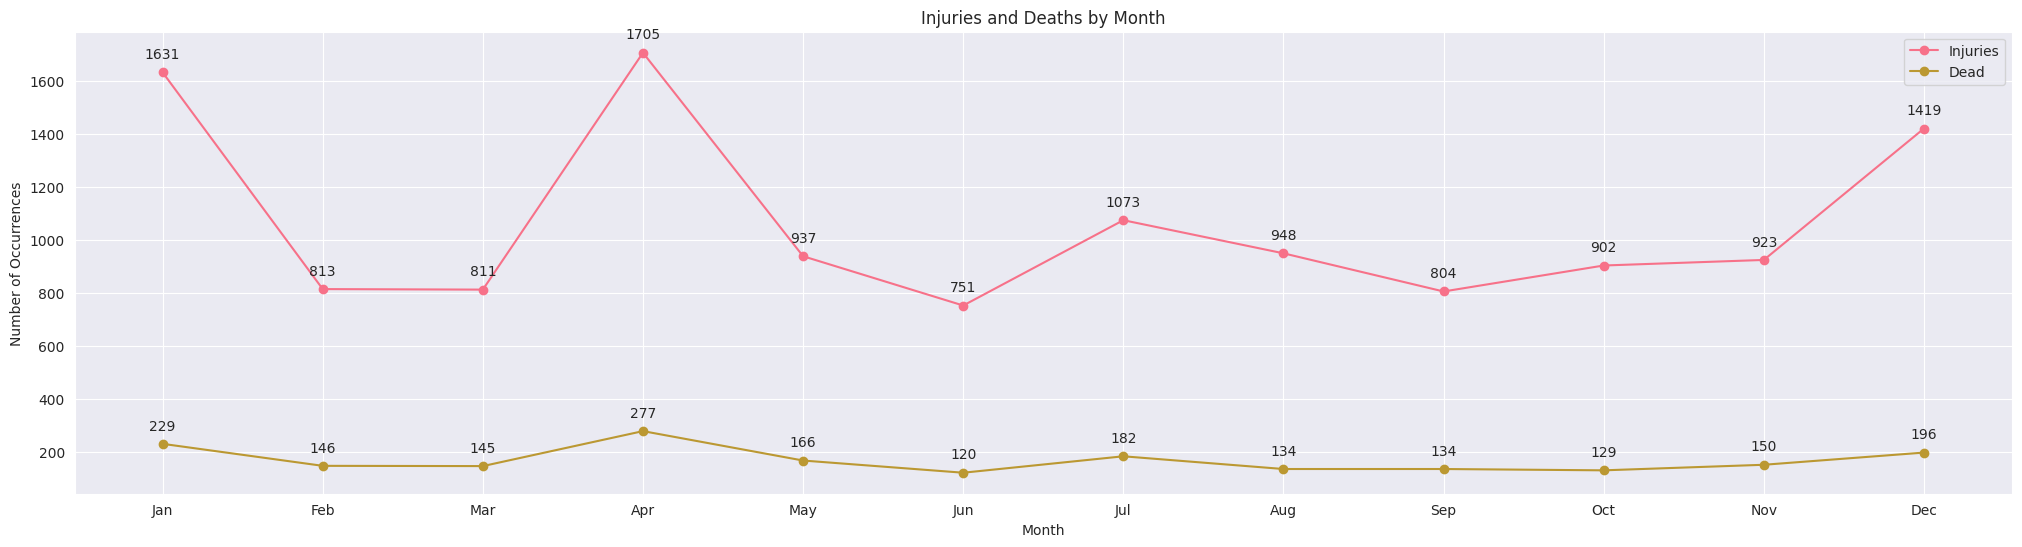

In [33]:
df = pd.DataFrame([injury_by_month,dead_by_month]).T
df.columns = ['Injuries', 'Dead']

sns.set_style("darkgrid")
sns.set_palette("husl")

ax = df.plot(kind="line", figsize=(25,6), marker='o') #ทําการ plot กราฟเส้นเพื่อดูแนวโน้ม

# ทําการ show values ของผู้บาดเจ็บบนกราฟ
for x,y in zip(range(len(df.index)), df['Injuries']):
    label = "{:.0f}".format(y)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

# ทําการ show values ของผู้เสียชีวิตบนกราฟ
for x,y in zip(range(len(df.index)), df['Dead']):
    label = "{:.0f}".format(y)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Injuries and Deaths by Month')
plt.xticks(range(len(df.index)), df.index)
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.show()


*   สรุปได้ว่าเดือนเมษายน มียอดผู้เสียชีวิตรวมจากอุบัติเหตุสูงมากที่สุด โดยมียอดผู้เสียชีวิตรวมอยู่ที่ 277 คน
*  และเดือนเมษายน มียอดผู้บาดเจ็บรวมจากอุบัติมากที่สุดเช่นกัน โดยมียอดผู้บาดเจ็บรวมอยู่ที่ 1705 คน





**ประเภทของทางบนถนนแบบใดที่มีความถี่ของการเกิดอุบัติเหตุขึ้นมากที่สุด 3 อันดับแรกในแต่ละเดือน ?**


In [34]:
TypeRoads_index = Accidents.groupby(['month'])['RoadType'].value_counts().index.tolist() #เก็บประเภทของทางหรือถนนแต่ละเดือน
TypeRoads_value = Accidents.groupby(['month'])['RoadType'].value_counts().values.tolist() #เก็บความถี่ของประเภทของทางหรือถนน
df_TypeRoad_Months = pd.DataFrame({"Months": [i[0] for i in TypeRoads_index],
                                   "TypeRoad_IDX": [i[1] for i in TypeRoads_index],
                                   "TypeRoads_Value": TypeRoads_value})

months_Name = [calendar.month_name[int(x)] for x in df_TypeRoad_Months['Months']] #เปลี่ยน month number -> month name

df_TypeRoad_Months = df_TypeRoad_Months.drop(['Months'],axis = 1,inplace = False)
df_TypeRoad_Months = df_TypeRoad_Months.set_index([months_Name])
df_TypeRoad_Months

,TypeRoad_IDX,TypeRoads_Value
January,ทางตรง+ไม่มีความลาดชัน,1511
January,ทางโค้งกว้าง+ไม่มีความลาดชัน,212
January,ทางโค้งกว้าง+ที่ลาดชัน,87
January,ทางเชื่อมเข้าพื้นที่สาธารณะ/เชิงพาณิชย์,42
January,ทางเชื่อมเข้าพื้นที่ส่วนบุคคล,25
...,...,...
December,ทางตรง+ที่ลาดชัน,11
December,ทางโค้งหักศอก+ที่ลาดชัน,7
December,ทางเชื่อมเข้าบริเวณหน้าโรงเรียน,4
December,ทางสามแยก (T),1


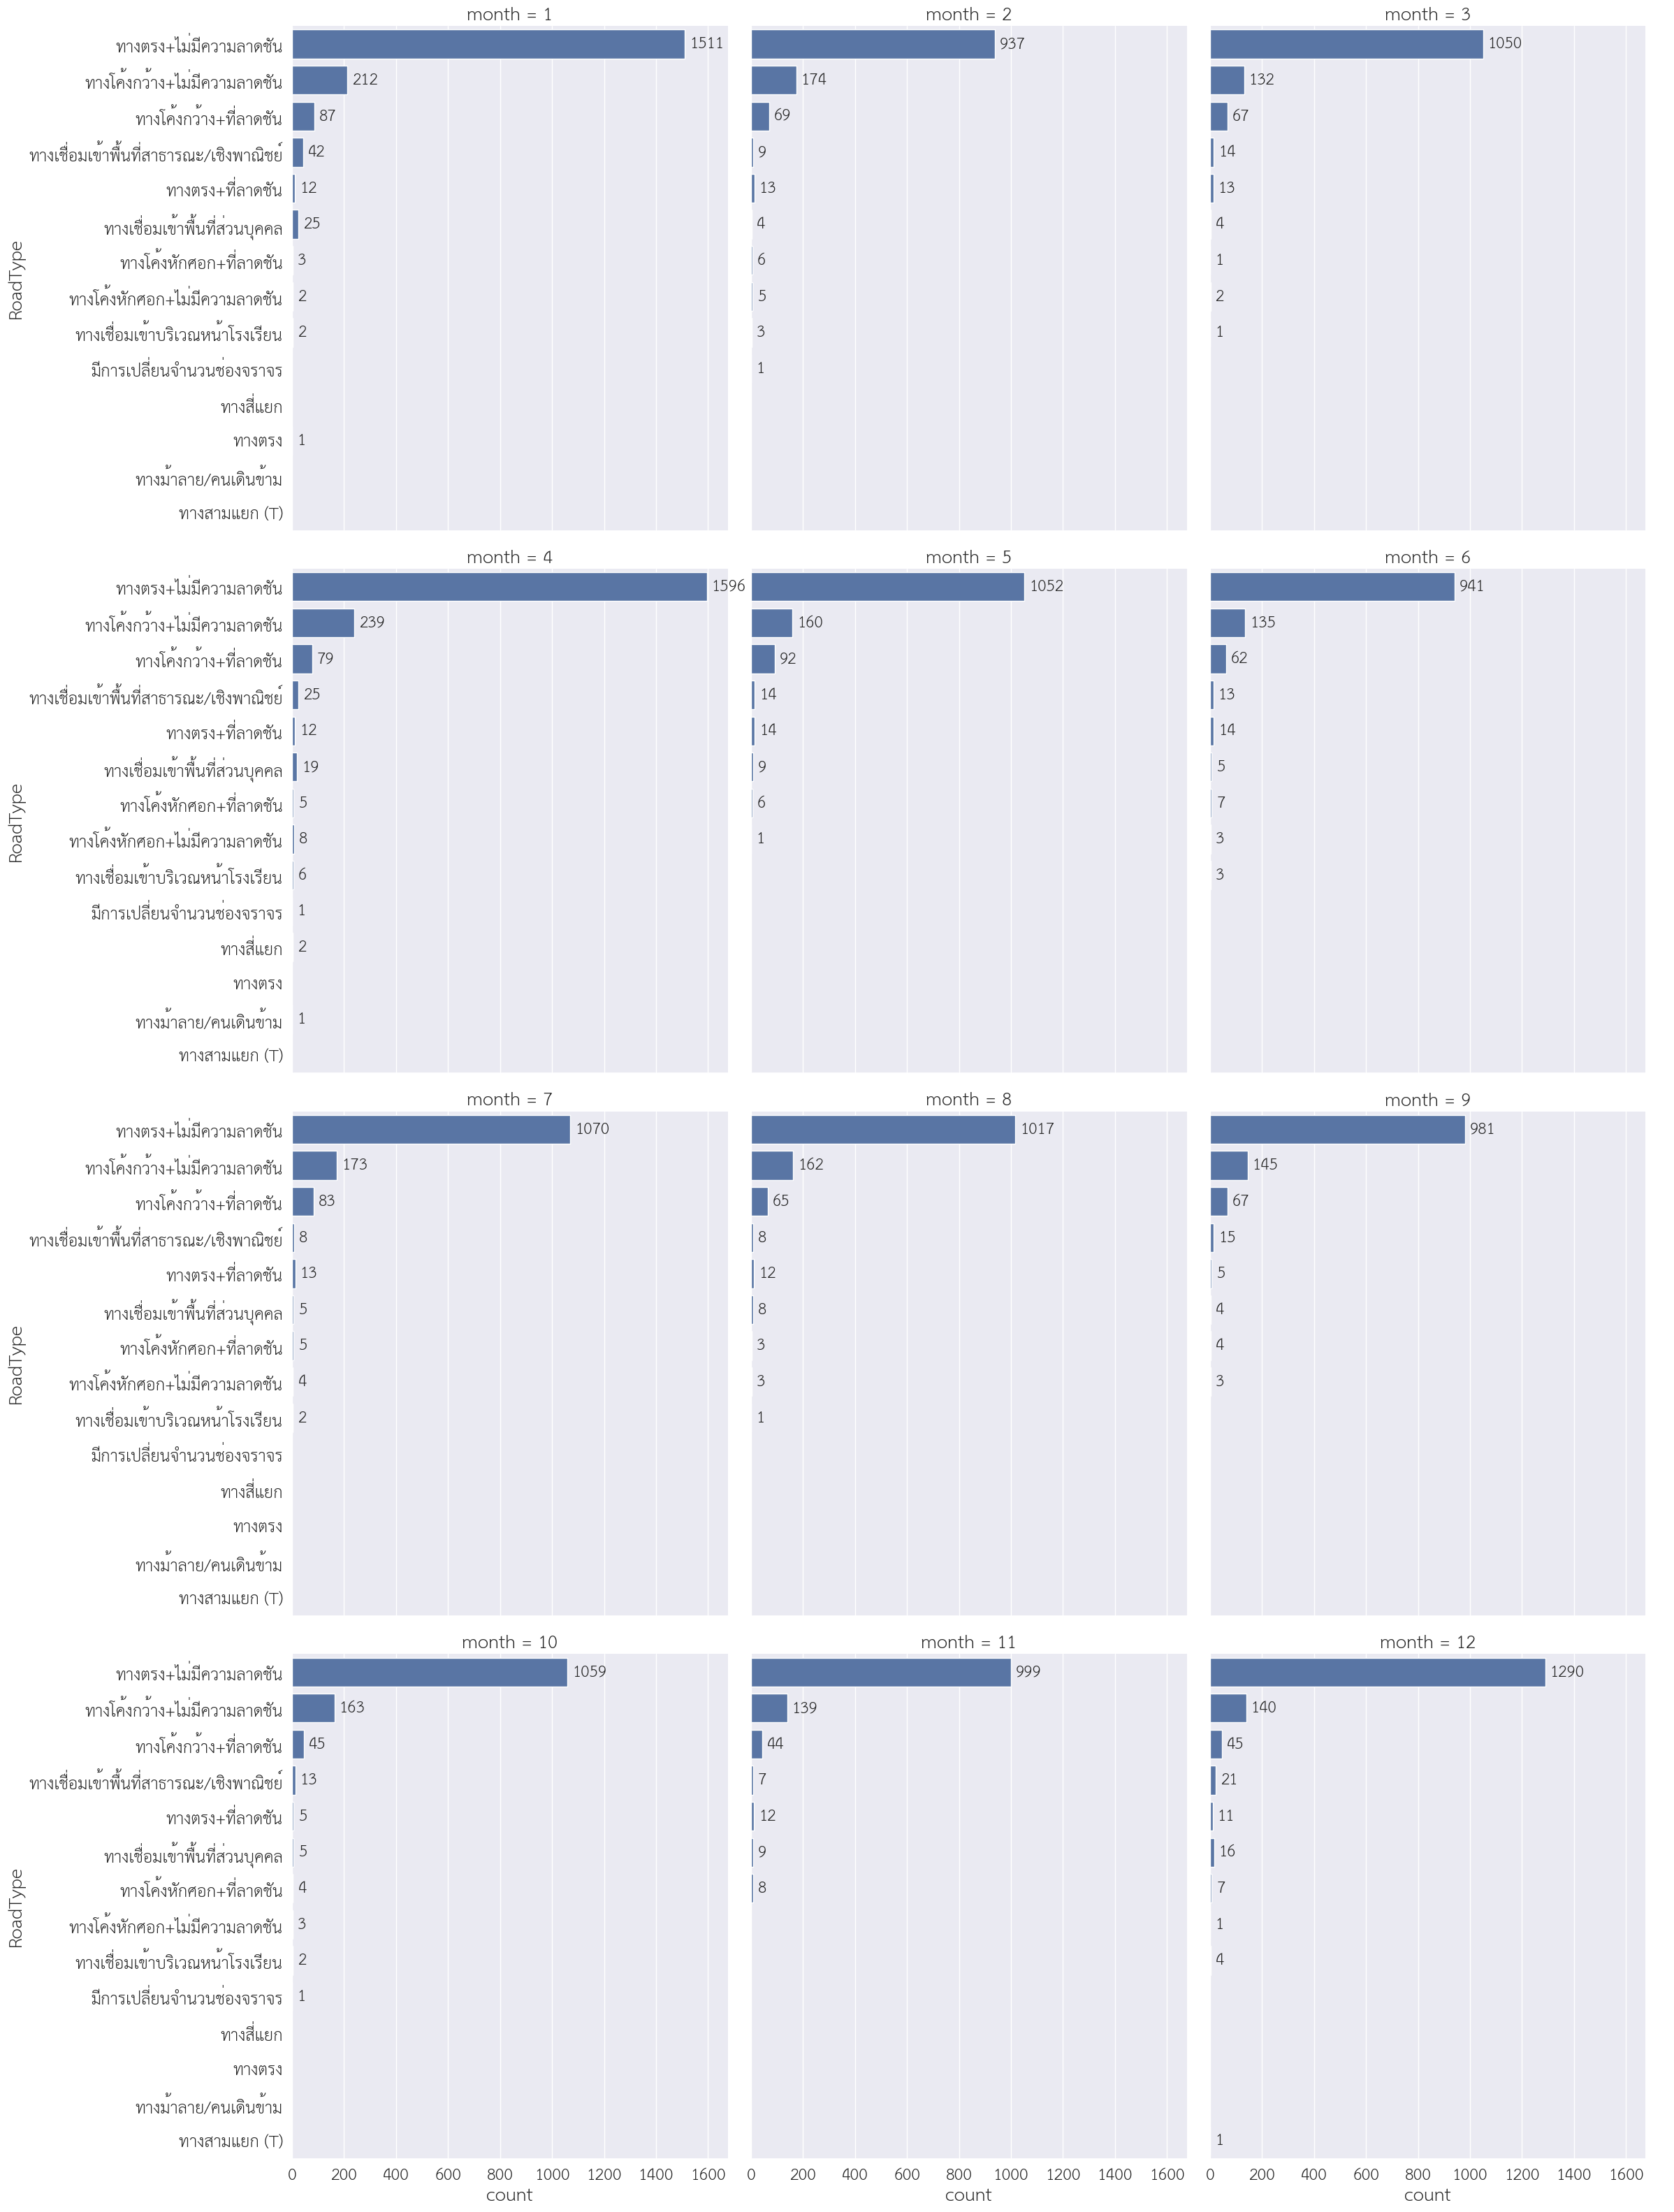

In [35]:
sns.set(font_scale=1.5)
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

orders = Accidents['RoadType'].value_counts().index
Roadtype_month = sns.catplot(y="RoadType", data=Accidents,
                             kind="count", col= "month",
                             order = orders,height = 8,col_wrap=3);

# ทําการ show values ของ RoadType บนกราฟ
for ax in Roadtype_month.axes.flat:
    for patch in ax.patches:
        x = patch.get_width()
        y = patch.get_y() + patch.get_height() / 2
        ax.annotate(f"{x:.0f}", (x, y), xytext=(5, 0),
        textcoords='offset points', va='center',fontsize = 16)

plt.show()

*   จากกราฟจะสังเกตได้ว่าประเภทของทางบนถนนที่มีความถี่ของการเกิดอุบัติเหตุขึ้นมากที่สุด 3 อันดับแรกในแต่ละเดือนนั้นไปในทิศทางเดียวกัน โดย 3 อันดับแรกได้แก่ 1.ทางตรง+ไม่มีความลาดชัน 2.ทางโค้งกว้าง+ไม่มีความลาดชัน 3.ทางโค้งกว้าง+ที่ลาดชัน



**ลักษณะการเกิดอุบัติแบบใดที่มีความถี่ในการเกิดอุบัติเหตุขึ้นมากที่สุด 3 อันดับในแต่ละเดือน ?**

In [36]:
AccidentType_index = Accidents.groupby(['month'])['AccidentType'].value_counts().index.tolist()  #เก็บลักษณะการเกิดอุบัติเหตุแต่ละเดือน
AccidentType_value = Accidents.groupby(['month'])['AccidentType'].value_counts().values.tolist() # เก็บความถี่ของลักษณะการเกิดอุบัติเหตุ
df_AccidentType_Months = pd.DataFrame({"Months":[i[0] for i in AccidentType_index],
                                       "TypeRoad_IDX":[i[1] for i in AccidentType_index]
                                   ,"TypeRoads_Value":AccidentType_value})
months_Name = [calendar.month_name[int(x)] for x in df_AccidentType_Months['Months']] #เปลี่ยน month number -> month name

df_AccidentType_Months = df_AccidentType_Months.drop(['Months'],axis = 1,inplace = False)
df_AccidentType_Months = df_AccidentType_Months.set_index([months_Name])
df_AccidentType_Months

,TypeRoad_IDX,TypeRoads_Value
January,พลิกคว่ำ/ตกถนนในทางตรง,807
January,ชนท้าย,621
January,พลิกคว่ำ/ตกถนนในทางโค้ง,238
January,ชนในทิศทางตรงกันข้าม (ไม่ใช่การแซง),93
January,ชนสิ่งกีดขวาง (บนผิวจราจร),53
...,...,...
December,ชนในทิศทางตรงกันข้าม (ไม่ใช่การแซง),87
December,ชนสิ่งกีดขวาง (บนผิวจราจร),53
December,ชนคนเดินเท้า,28
December,อื่นๆ,23


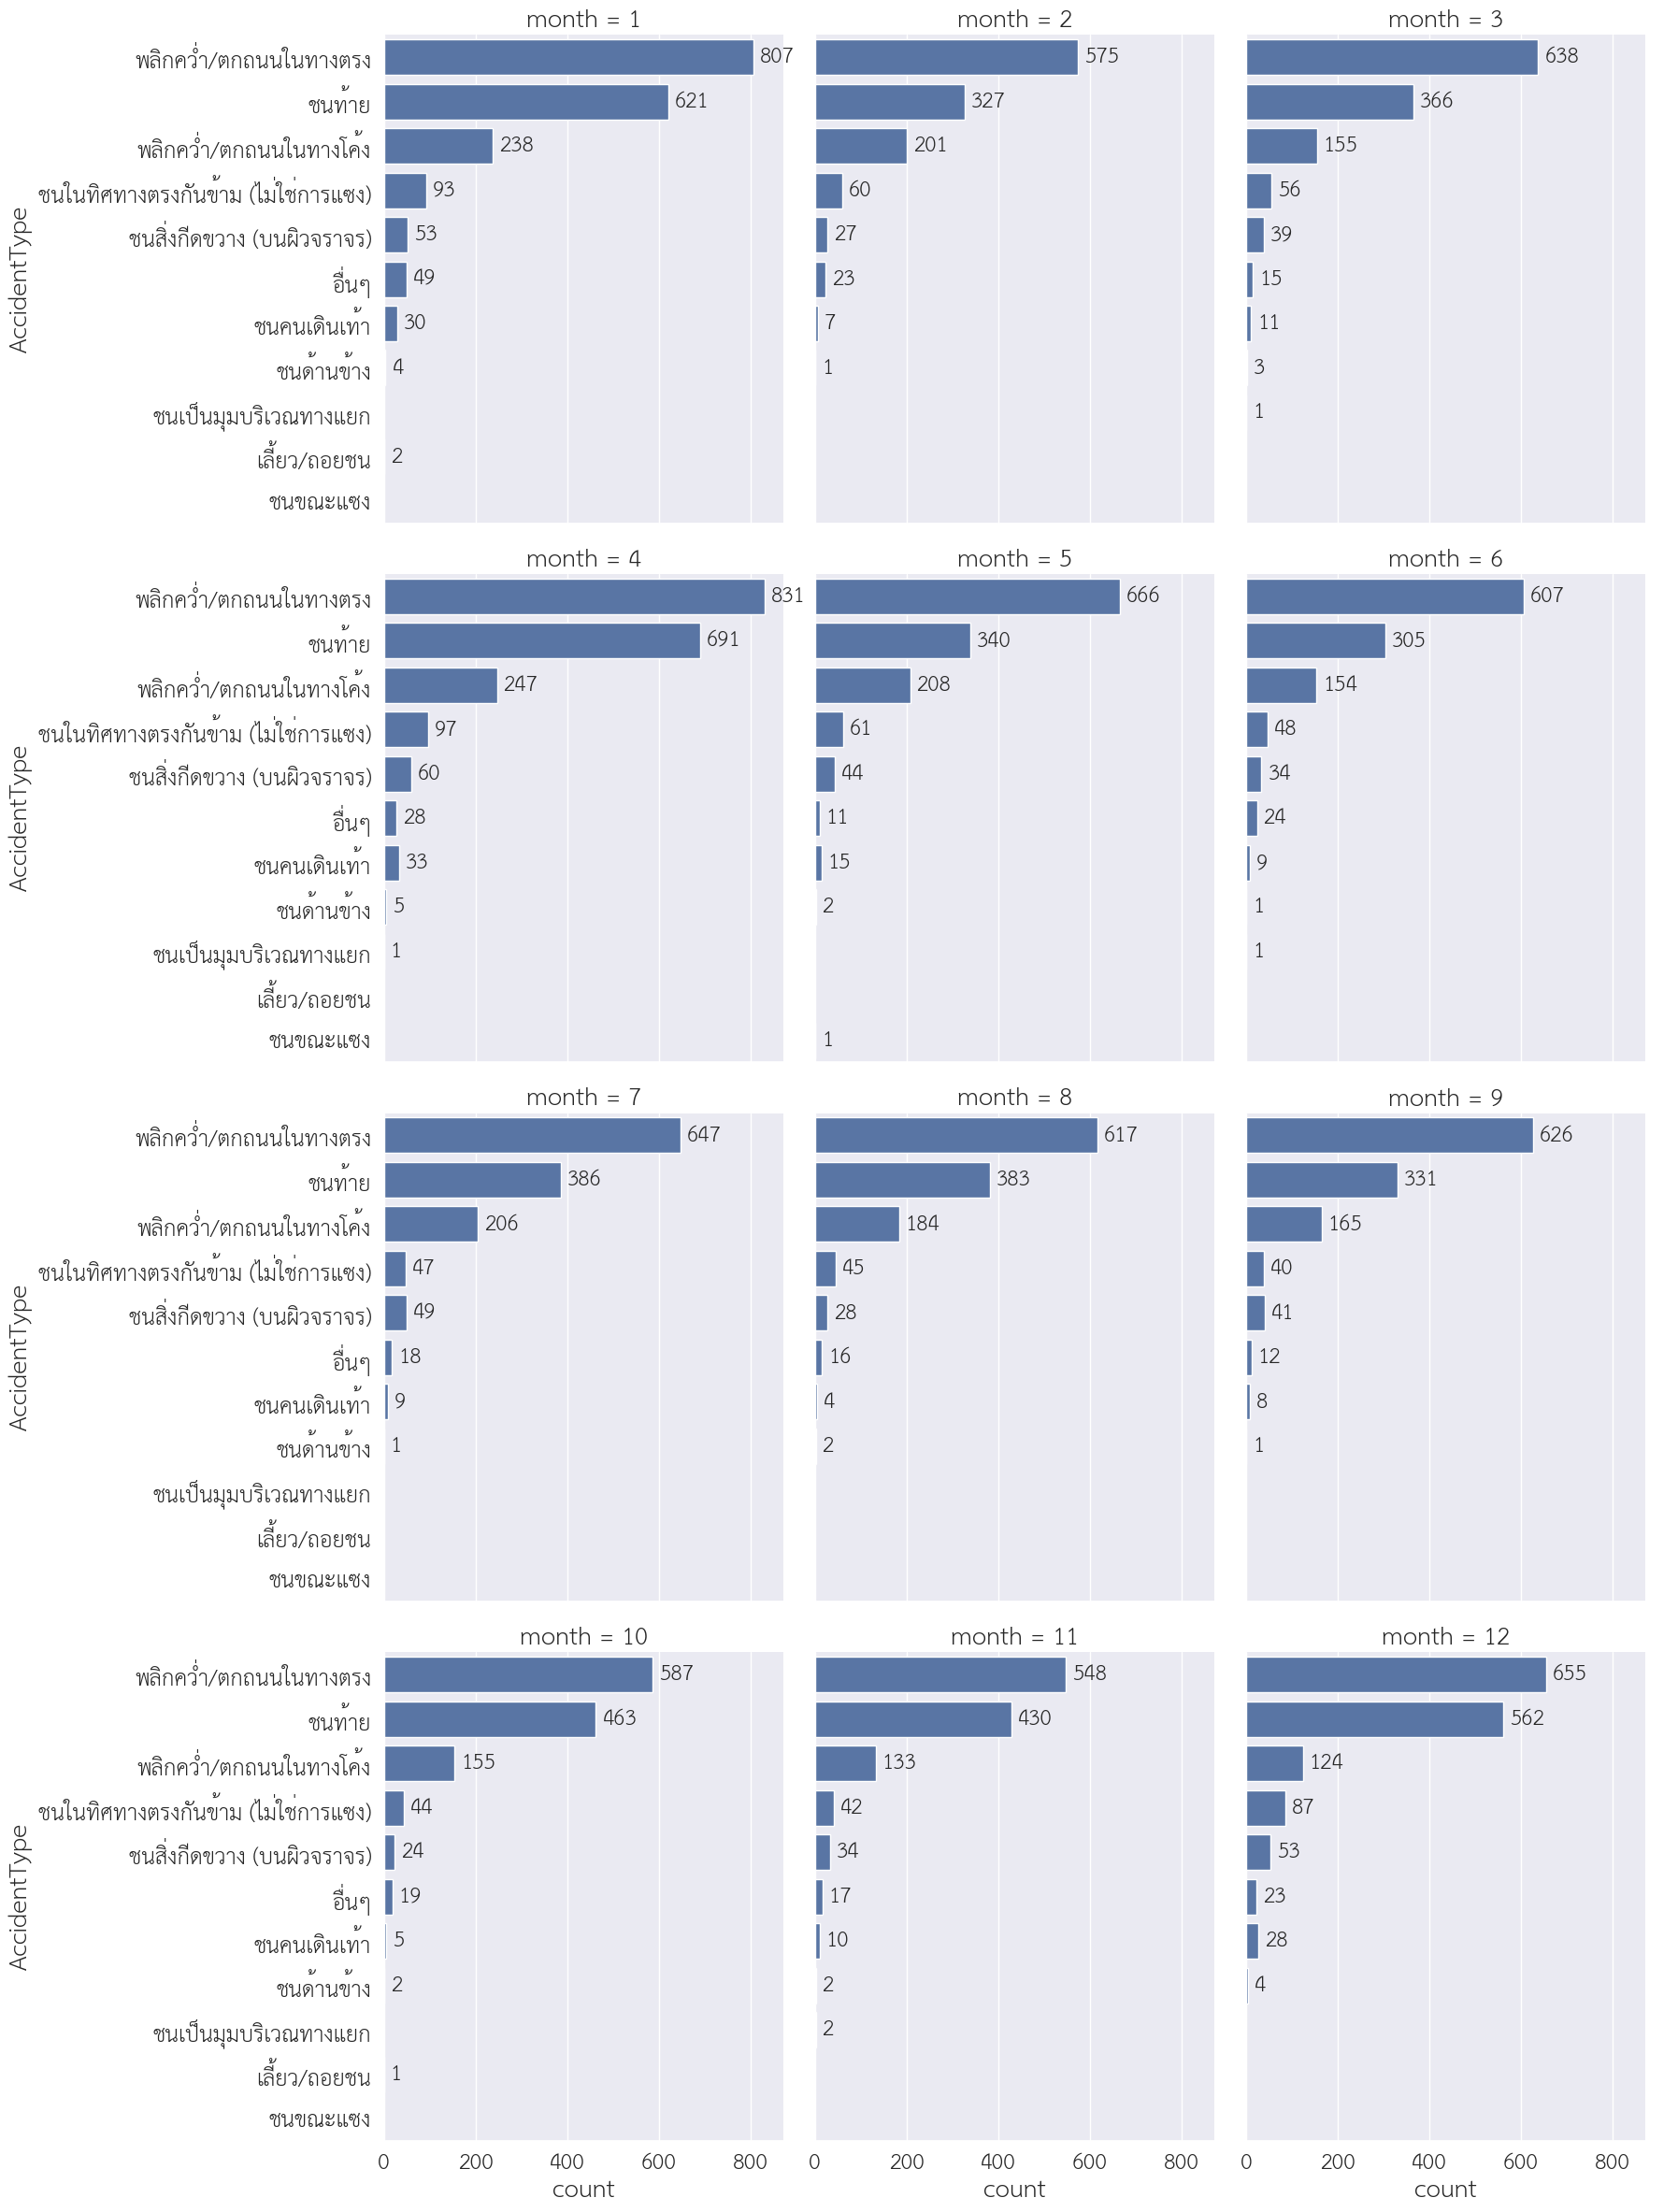

In [37]:
sns.set(font_scale=1.5)
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

Acctype_month = sns.catplot(y="AccidentType", data=Accidents, kind="count",
                            col= "month",order=Accidents['AccidentType'].value_counts().index,
                            height = 6,col_wrap=3);

# ทําการ show values ของ AccidentType บนกราฟ
for ax in Acctype_month.axes.flat:
    for patch in ax.patches:
        x = patch.get_width()
        y = patch.get_y() + patch.get_height() / 2
        ax.annotate(f"{x:.0f}", (x, y), xytext=(5, 0), textcoords='offset points',
                    va='center',fontsize = 16)

plt.show()


*   จากกราฟจะสังเกตได้ว่าลักษณะการเกิดอุบัติเหตุที่เกิดขึ้นมากที่สุด 3 อันดับแรกในแต่ละเดือนนั้นไปในทิศทางเดียวกัน โดย 3 อันดับแรกได้แก่ 1.พลิกคว่ำ/ตกถนนในทางตรง 2.ชนท้าย 3.พลิกคว่ำ/ตกถนนในทางโค้ง


**เดือนใดที่มีจํานวนรถที่เกิดเหตุทั้งหมดมากที่สุด ?**

In [38]:
Car_IncludeFirstCar_index = Accidents['month'].unique().tolist() #เก็บเดือน
Car_IncludeFirstCar_value = Accidents.groupby(['month'])['NumOfCar_Include_firstCar'].sum().sort_values(ascending = True).values.tolist() #เก็บผลรวมของรถที่เกิดเหตุ (รวมรถคันแรก)
Car_IncludePedestrian_value = Accidents.groupby(['month'])['NumOfAccident_Include_pedestrian'].sum().sort_values(ascending = True).values.tolist() #เก็บผลรวมของรถที่เกิดเหตุ (รวมคนเดินเท้า)

Months_name = [calendar.month_name[x] for x in Car_IncludeFirstCar_index] # month number -> month name
#Months_name
df_Car_Months = pd.DataFrame({"Car_month_IDX":Months_name,
                                                "Car_IncludeFirstCar_Value":Car_IncludeFirstCar_value,
                                                "Car_IncludePedestrian_Value":Car_IncludePedestrian_value})

df_Car_Months = df_Car_Months.set_index(['Car_month_IDX'])
df_Car_Months

,Car_IncludeFirstCar_Value,Car_IncludePedestrian_Value
Car_month_IDX,,
January,1696,1705
February,1743,1751
March,1771,1779
April,1866,1878
May,1870,1882
June,1876,1882
July,1944,1961
August,2019,2027
September,2053,2058


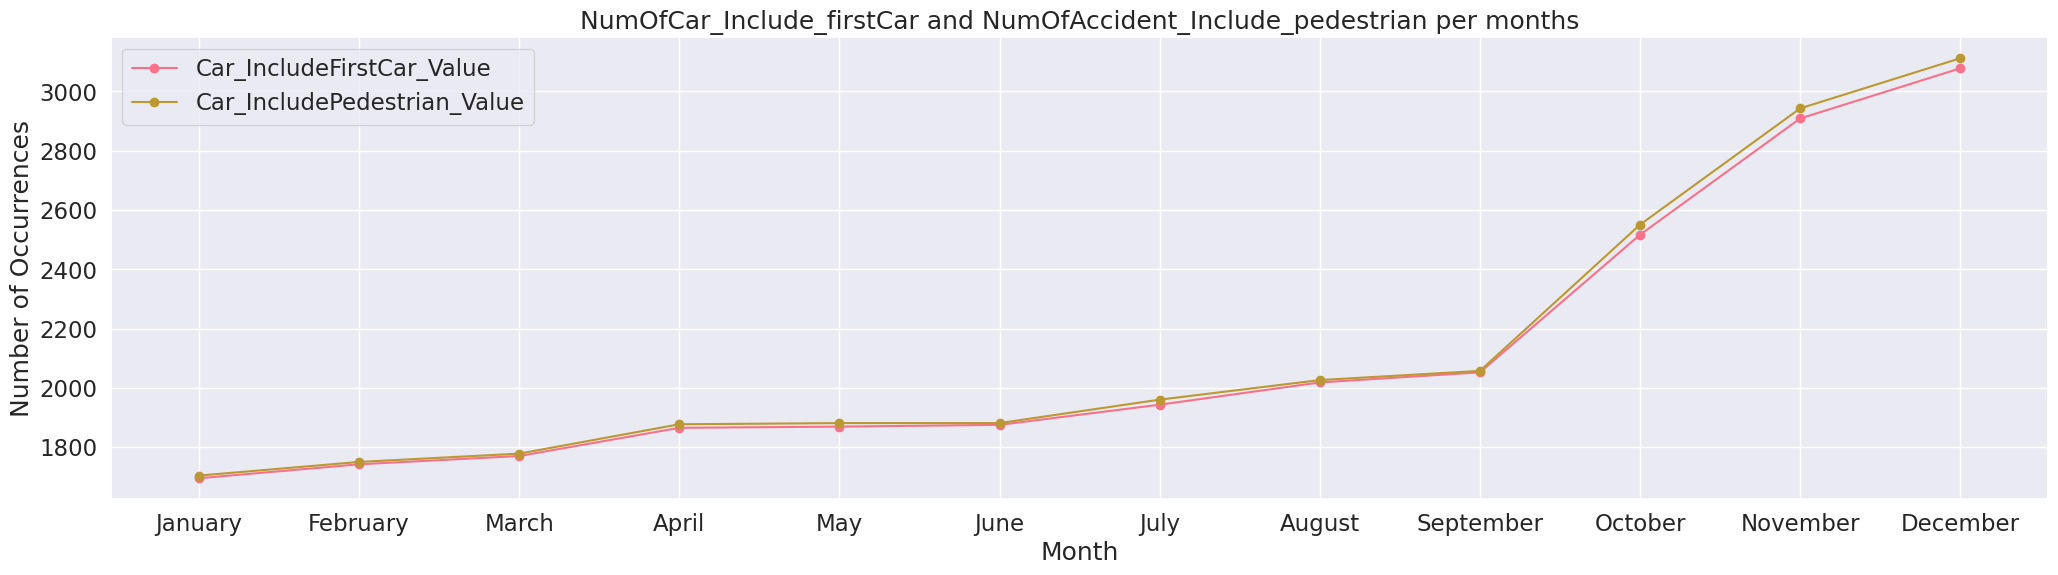

In [39]:
#df = pd.DataFrame(NumOfCar_by_monthsorted).T
#df.columns = ['NumOfCar_Include_firstCar', 'NumOfAccident_Include_pedestrian']

sns.set_style("darkgrid")
sns.set_palette("husl")

ax = df_Car_Months.plot(kind="line", figsize=(25,6), marker='o')

plt.title('NumOfCar_Include_firstCar and NumOfAccident_Include_pedestrian per months')
plt.xticks(range(len(df_Car_Months.index)), df_Car_Months.index)
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.show()



*   จากกราฟสรุปได้ว่าเดือนเมษายนมีจํานวนรถที่เกิดเหตุมากที่สุดทั้งแบบรวมคันแรกและแบบรวมคนเดินเท้า



**จากลักษณะการเกิดอุบัติเหตุแต่ละแบบส่วนใหญ่เกิดกับยานพาหนะประเภทใด ?**

In [40]:
vehicles_by_accident_type = Accidents.groupby('AccidentType').apply(lambda x : x[['Motorcycle', 'tricycle',
       'Public_Cars', 'Van', 'Passenger_pickup_truck', 'Bus_LessThan4wheels',
       'PickupTruck_4wheels', 'Truck_6wheels', 'Truck_LessThan10wheels',
       'Truck_MoreThan10wheels', 'Etan_car', 'Else']].sum())
vehicles_by_accident_type

,Motorcycle,tricycle,Public_Cars,Van,Passenger_pickup_truck,Bus_LessThan4wheels,PickupTruck_4wheels,Truck_6wheels,Truck_LessThan10wheels,Truck_MoreThan10wheels,Etan_car,Else
AccidentType,,,,,,,,,,,,
ชนขณะแซง,0,0,1,0,0,0,0,0,0,0,0,0
ชนคนเดินเท้า,38,1,48,5,0,0,57,3,4,5,0,15
ชนด้านข้าง,8,0,11,2,0,0,19,2,2,7,0,4
ชนท้าย,2088,78,3912,206,32,0,3808,451,341,894,0,255
ชนสิ่งกีดขวาง (บนผิวจราจร),246,6,186,16,1,0,223,50,47,104,0,25
ชนเป็นมุมบริเวณทางแยก,3,0,3,1,0,0,4,0,0,1,0,0
ชนในทิศทางตรงกันข้าม (ไม่ใช่การแซง),305,10,373,23,4,0,631,65,33,87,0,23
พลิกคว่ำ/ตกถนนในทางตรง,514,11,1968,103,16,0,3716,304,236,661,0,432
พลิกคว่ำ/ตกถนนในทางโค้ง,105,3,480,26,2,0,1065,130,73,237,0,70


In [41]:
#vehicles_by_accident_type = Accidents.groupby('AccidentType')['Motorcycle', 'tricycle',
#       'Public_Cars', 'Van', 'Passenger_pickup_truck', 'Bus_LessThan4wheels',
#       'PickupTruck_4wheels', 'Truck_6wheels', 'Truck_LessThan10wheels',
#       'Truck_MoreThan10wheels', 'Etan_car', 'Else'].sum() #เก็บผลรวมของยานพาหนะแต่ละประเภทโดยแบ่งตามลักษณะการเกิดอุบัติเหตุ

fig = go.Figure()
for column in vehicles_by_accident_type.columns:
    fig.add_trace(go.Bar(
        x=vehicles_by_accident_type.index,
        y=vehicles_by_accident_type[column],
        name=column,
        text=vehicles_by_accident_type[column],
        textposition='auto'
    ))

fig.update_layout(
    width=1300,
    height=650,
    title='Number of Vehicles by Accident Type',
    xaxis_title='Accident Type',
    yaxis_title='Number of Vehicles',
    legend_title='Vehicle Type',
    font=dict(size=14),
    barmode='stack'
)
fig.show()

#print(Accidents.groupby('AccidentType')['Public_Cars','PickupTruck_4wheels'].sum())

*   จากกราฟสังเกตได้ว่าลักษณะการเกิดอุบัติเหตุส่วนใหญ่จะเกิดกับยานพาหนะประเภท รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ และ รถปิคอัพบรรทุก 4 ล้อ
*   เช่น ลักษณะอุบัติเหตุประเภทชนท้ายเกิดกับยานพาหนะประเภทรถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะมากที่สุด ในขณะที่ลักษณะพลิกควํ่า/ตกถนนในทางตรงจะเกิดกับรถปิคอัพบรรทุก 4 ล้อ มากที่สุด



**ช่วงวันใดควรระมัดระวังการเดินทางโดยพิจารณาจากจํานวนรถที่เกิดเหตุต่อวันและเดือน ?**

In [42]:
acc_byDayAndMonth_index = Accidents.groupby(['day', 'month'])['NumOfCar_Include_firstCar'].sum().index.tolist() #เก็บ index คือวันและเดือน
acc_byDayAndMonth_value = Accidents.groupby(['day', 'month'])['NumOfCar_Include_firstCar'].sum().values.tolist() #เก็บผลรวมของจํานวนรถที่เกิดเหตุ


df_acc_Months = pd.DataFrame({"day": [i[0] for i in acc_byDayAndMonth_index],
                              "month": [i[1] for i in acc_byDayAndMonth_index],
                              "CarAccident_byDayAndMonth_Value": acc_byDayAndMonth_value})

df_acc_Months = df_acc_Months.set_index(['day', 'month'])
df_acc_Months

CarAccident_byDayAndMonth_Value
day month                                 
1   1                                  375
    2                                   73
    3                                   79
    4                                   59
    5                                   68
...                                    ...
31  5                                   77
    7                                  105
    8                                   74
    10                                  57
    12                                 230

[365 rows x 1 columns]

In [43]:
accidents_by_hour_and_day = Accidents.groupby(['day', 'month'])['NumOfCar_Include_firstCar'].sum()
accidents_by_hour_and_day

day  month
1    1        375
     2         73
     3         79
     4         59
     5         68
             ... 
31   5         77
     7        105
     8         74
     10        57
     12       230
Name: NumOfCar_Include_firstCar, Length: 365, dtype: int64

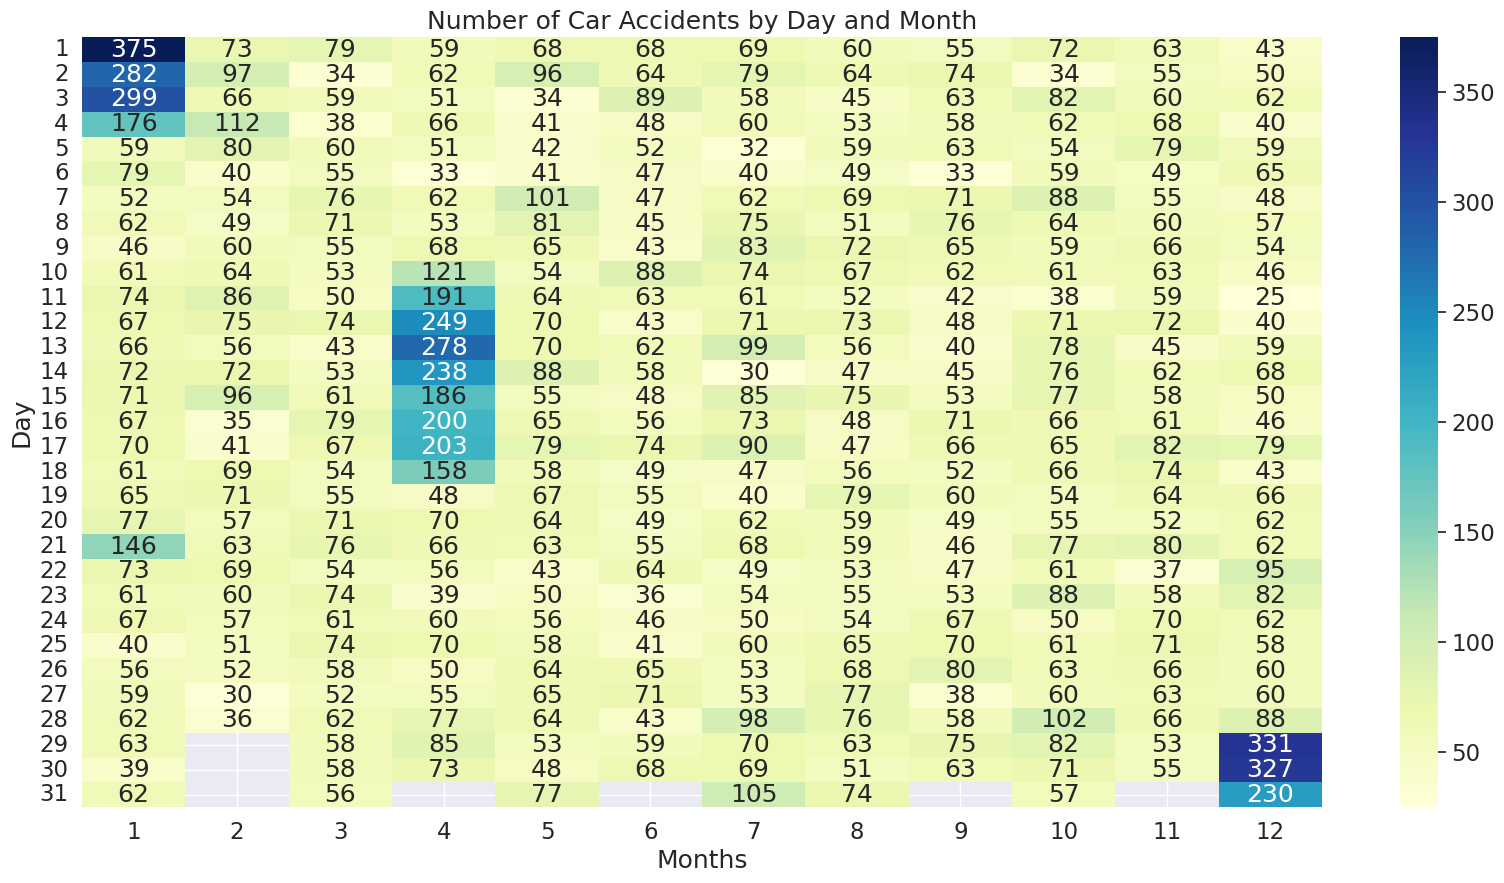

In [44]:
# Group the data by day and month and count the number of CarAccidents
accidents_by_hour_and_day = Accidents.groupby(['day', 'month'])['NumOfCar_Include_firstCar'].sum()

# Reshape the data to create a pivot table
accidents_by_hour_and_day = accidents_by_hour_and_day.reset_index()
accidents_by_hour_and_day = accidents_by_hour_and_day.pivot_table(index='day', columns='month',
                                                                  values='NumOfCar_Include_firstCar', aggfunc='sum')

# Create a heatmap of the number of accidents by day and month
plt.figure(figsize=(20, 10))
sns.heatmap(accidents_by_hour_and_day, cmap='YlGnBu', annot=True, fmt='.0f')
plt.xlabel('Months')
plt.ylabel('Day')
plt.title('Number of Car Accidents by Day and Month')
plt.show()


*   จากกราฟแบบ Heatmap สังเกตได้ว่า ช่วงเดือนที่ 1 ในวันที่ 1-4, เดือนที่ 4 วันที่ 10-18 และเดือนที่ 12 ช่วงวันที่ 29-31 มีจํานวนรถที่เกิดเหตุเป็นจํานวนมากกว่าช่วงอื่นๆ
*  ดังนั้นสรุปได้ว่าช่วงเวลาข้างต้นมีโอกาศเกิดอุบัติเหตุเป็นจํานวนมาก ดังนั้นควรระวังช่วงวันดังกล่าว



**อุบัติเหตุที่เกิดเกิดในสภาพอากาศแบบใดบ้าง โดยเทียบกับจํานวนยานหนะรวมที่เกิดเหตุ ?**

In [45]:
CarAccidents_weather_Idx = Accidents.groupby('Weather')['NumOfCar_Include_firstCar'].sum().index.tolist() #เก็บสภาพอากาศแต่ละแบบ
CarAccidents_weather_Value = Accidents.groupby('Weather')['NumOfCar_Include_firstCar'].sum().values.tolist() #เก็บผลรวมของจํานวนรถที่เกิดเหตุ
df_CarAccidents_weather = pd.DataFrame({"Weathers_IDX":CarAccidents_weather_Idx,
                                     "CarAccidents_Values":CarAccidents_weather_Value})
df_CarAccidents_weather

,Weathers_IDX,CarAccidents_Values
0,ฝนตก,3188
1,ภัยธรรมชาติ เช่น พายุ น้ำท่วม,13
2,มีหมอก/ควัน/ฝุ่น,151
3,มืดครึ้ม,5
4,แจ่มใส,21985


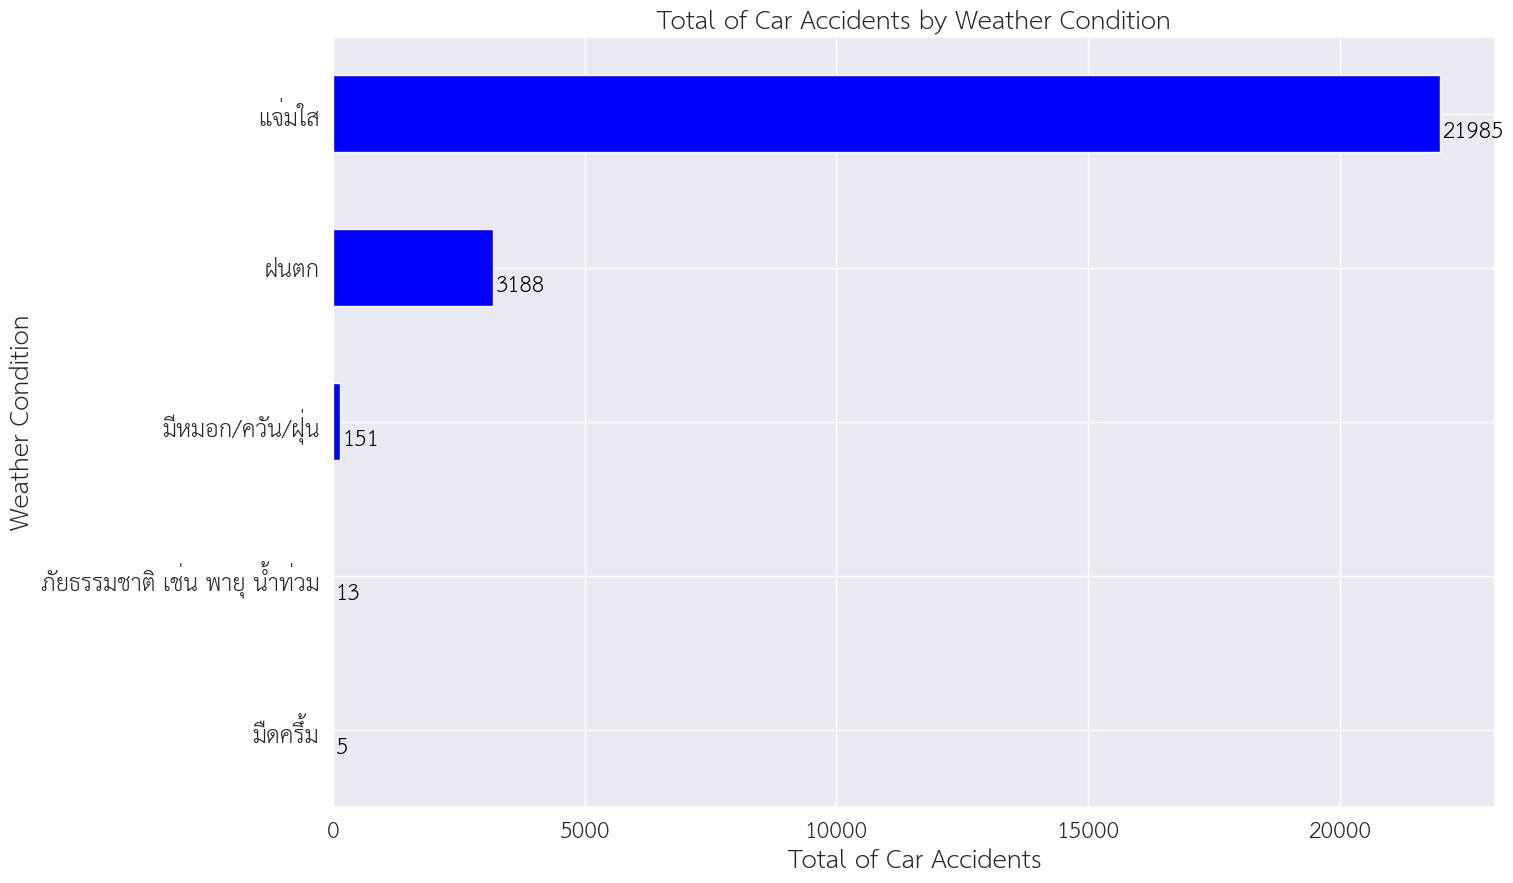

In [46]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

CarAcc_Weather = Accidents.groupby('Weather')['NumOfCar_Include_firstCar'].sum().sort_values() #เก็บผลรวมของจํานวนรถที่เกิดเหตุตามแต่สภาพอากาศ
ax = CarAcc_Weather.plot(kind='barh', color='blue',figsize = (15,10))

for i, v in enumerate(CarAcc_Weather):
    #print(i,v)
    ax.text(v + 50, i - 0.15, str(v), color='black', fontsize=16)

ax.set_title('Total of Car Accidents by Weather Condition')
ax.set_xlabel('Total of Car Accidents')
ax.set_ylabel('Weather Condition')

plt.show()



*   จากกราฟสรุปได้ว่า จํานวนของรถที่เกิดอุบัติเหตุส่วนใหญ่เกิดในสภาพอากาศที่แจ่มใส รองลงมาคือ ฝนตก


**สัดส่วนความถี่ของผู้ที่บาดเจ็บอย่างน้อย 1 คน, ผู้เสียชีวิตอย่างน้อย 1 คน,ผู้ที่ไม่บาดเจ็บ, ไม่เสียชีวิตเลยเป็นอย่างไร ?**

In [47]:
#Filter เพื่อเช็คความถี่ของผู้บาดเจ็บ,ผู้เสียชีวิต
No_Deads = Accidents[Accidents['Dead']<1] #No Dead
Deads = Accidents[Accidents['Dead']>=1] #Dead at least 1 person
No_Injuries = Accidents[Accidents['Total_Injured']<1] # No Injuru
Injuries = Accidents[Accidents['Total_Injured']>=1] # Injury at least 1 person

#คิดความถี่ของผู้เสียชีวิต
print("ไม่มีจํานวนผู้เสียชีวิตเลย = ",No_Deads.Dead.count(),
      "คิดเป็น % เท่ากับ ",No_Deads.Dead.count()/Accidents['Dead'].count() * 100)
print("มีจํานวนผู้เสียชีวิตอย่างน้อย 1 คน = ",Deads['Dead'].count(),
      "คิดเป็น % เท่ากับ ",Deads['Dead'].count()/Accidents['Dead'].count() * 100)

print("รวมทั้งไม่มีผู้เสียชีวิตและเสียชีวิต = ",Accidents['Dead'].count())
print("==============================================")

#คิดความถี่ของผู้บาดเจ็บ
print("ไม่มีจํานวนผู้บาดเจ็บเลย = ",No_Injuries['Total_Injured'].count(),
      "คิดเป็น % เท่ากับ ",No_Injuries['Total_Injured'].count()/Accidents['Total_Injured'].count() * 100)
print("มีจํานวนผู้บาดเจ็บอย่างน้อย 1 คน = ",Injuries['Total_Injured'].count(),
      "คิดเป็น % เท่ากับ ",Injuries['Total_Injured'].count()/Accidents['Total_Injured'].count() * 100)
print("รวมทั้งผู้บาดเจ็บและไม่บาดเจ็บ = ",Accidents['Total_Injured'].count())


ไม่มีจํานวนผู้เสียชีวิตเลย =  15141 คิดเป็น % เท่ากับ  89.87890300368039
มีจํานวนผู้เสียชีวิตอย่างน้อย 1 คน =  1705 คิดเป็น % เท่ากับ  10.1210969963196
รวมทั้งไม่มีผู้เสียชีวิตและเสียชีวิต =  16846
ไม่มีจํานวนผู้บาดเจ็บเลย =  9220 คิดเป็น % เท่ากับ  54.73109343464324
มีจํานวนผู้บาดเจ็บอย่างน้อย 1 คน =  7626 คิดเป็น % เท่ากับ  45.26890656535676
รวมทั้งผู้บาดเจ็บและไม่บาดเจ็บ =  16846


In [48]:
values_merge = [No_Deads.Dead.count(),Deads['Dead'].count(),No_Injuries['Total_Injured'].count()
,Injuries['Total_Injured'].count()]
labels3 = ['No deaths', 'Deaths','No Injuries','Injuries']
colors3 = ['#1f77b4', '#ff7f0e','#ff6019','#ffb2d6']
fig3 = go.Figure(data = [go.Pie(labels=labels3, values=values_merge, textinfo='percent',
                                marker=dict(colors=colors3))])
fig3.update_layout(title = 'Percentage of Accidents with and Without Deads and Injuries')

fig3.show()


*   สรุปได้ว่าอุบัติเหตุส่วนใหญ่ที่เกิดไม่มีผู้เสียชีวิตถึง 44.9% รองลงมาไม่มีผู้บาดเจ็บถึง 27.1% มีผู้บาดเจ็บ 22.6% และน้อยที่สุดคือมีผู้เสียชีวิต 5.06%  



**เทียบสาเหตุการเกิดอุบัติเหตุแต่ละแบบ ว่ามีผลรวมของผู้เสียชีวิตกับผู้บาดเจ็บเป็นอย่างไร ?**

In [49]:
#Deads = Accidents[Accidents['Dead']>=1]
#Injuries = Accidents[Accidents['Total_Injured']>=1]

idx_Dead = Accidents.groupby(['Cause'])['Dead'].sum().index.tolist() #เก็บสาเหตุการเกิดอุบัติเหตุ
value_Dead = Accidents.groupby(['Cause'])['Dead'].sum().values.tolist() #เก็บผลรวมของผู้เสียชีวิต

idx_Injury = Injuries.groupby(['Cause'])['Total_Injured'].sum().index.tolist()
value_Injury = Injuries.groupby(['Cause'])['Total_Injured'].sum().values.tolist() #เก็บผลรวมของผู้บาดเจ็บ

fig = go.Figure()
fig.add_trace(go.Bar(x=value_Dead, y=idx_Dead,
                name='Deaths', marker_color='rgb(255, 53, 53)',orientation='h'))
fig.add_trace(go.Bar(x=value_Injury, y=idx_Injury,
                name='Injuries', marker_color='rgb(26, 118, 255)',orientation='h'))
fig.update_layout(title='Total of Deads and Injuries Accidents by Cause',
                   xaxis=dict(title='Cause of Accident'),
                   yaxis=dict(title='Total of Dead and Injury'),
                   barmode='stack',width = 1200,height = 700)
#fig.update_yaxes(range=[0,15000])
fig.show()

*   จากกราฟสรุปได้ว่า สาเหตุของการเกิดอุบัติเหตุส่วนใหญ่มีผู้บาดเจ็บมากกว่าผู้เสียชีวิต
*   ตัวอย่างเช่น สาเหตุที่เป็นขับรถเร็วเกินกําหนดสรุปได้ว่า มีความถี่ของผู้บาดเจ็บเป็นส่วนใหญ่รองลงมาคือมีผู้เสียชีวิต





# 3.สรุปข้อมูลทั้งหมด

> **เดือนใดมีความถี่การเกิดอุบัติเหตุมากที่สุดและน้อยที่สุดและมีค่าเฉลี่ยเท่าใด ?**






*   เดือนเมษายนคือเดือนที่มีความถี่ของการเกิดอุบัติเหตุมากที่สุด รองลงมาคือเดือนมกราคม และเดือนธันวาคม โดยมีความถี่คือ 1993,1897 และ 1536
*   เดือนมิถุนายนมีความถี่ของการเกิดอุบัติเหตุน้อยที่สุด โดยมีความถี่เป็น 1183
*   ค่าเฉลี่ยของความถี่ในการเกิดอุบัติเหตุแต่ละเดือนเป็น 1403.83






> **วันไหนของเดือนที่มีความถี่การเกิดอุบัติเหตุมากที่สุดและน้อยที่สุดและมีค่าเฉลี่ยเท่าใด ?**





*   วันที่ 1 ของทุกเดือนมีความถี่ในการเกิดอุบัติเหตุมากที่สุด รองลงมาเป็นวันที่ 2 และ 13 โดยมีความถี่เป็น 733, 658 และ 620 ตามลําดับ
*   วันที่ 6 ของทุกเดือนมีความถี่ในการเกิดอุบัติเหตุน้อยที่สุด โดยมีความถี่เป็น 404

*   ค่าเฉลี่ยของความถี่ในการเกิดอุบัติเหตุแต่ละวันของทุกเดือนเป็น 543.42







> **เวลาที่ชั่วโมงใดมีความถี่ในการเกิดอุบัติเหตุมากที่สุดและน้อยที่สุด ?**





*   เวลา 15 นาฬิกามีความถี่ของจํานวนการเกิดอุบัติเหตุมากที่สุด โดยมีความถี่เป็น 974
*   ช่วงเวลา 3 นาฬิกามีความถี่ของจํานวนการเกิดอุบัติเหตุน้อยที่สุด โดยมีความถี่เป็น 482





> **จังหวัดใดมีจํานวนการเกิดอุบัติเหตุมากที่สุด 5 อันดับแรก ?**





*   จังหวัดที่มีความถี่ในการเกิดอุบัติเหตุมากที่สุด 5 อันดับแรก คือ 1. กรุงเทพมหานคร 2.ชลบุรี 3.นครราชสีมา 4.เชียงใหม่ และ 5.สุพรรณบุรี โดยมีความถี่เป็น 1332, 1056 762 639 และ 494 ตามลําดับ






> **ถนนหรือทางแบบใดที่มีความถี่ในการเกิดอุบัติเหตุมากที่สุด 3 อันดับแรก?**





*   ถนนหรือทางที่มีความถี่ในการเกิดอุบัติเหตุมากที่สุด 3 อันดับแรกได้แก่ 1.ทางตรง+ไม่มีความลาดชัน 2.ทางโค้งกว้าง+ไม่มีความลาดชัน และ 3.ทางโค้งกว้าง+ที่ลาดชัน โดยมีความุุถี่เป็น 13503, 1974 และ 805 ตามลําดับ






> **ลักษณะการเกิดอุบัติแบบใดที่มีจํานวนการเกิดอุบัติเหตุมากที่สุด 3 อันดับแรก ?**





*   ลักษณะการเกิดอุบัติเหตุที่มีความถี่มากที่สุด 3 อันดับแรกได้แก่ 1.พลิกคว่ำ/ตกถนนในทางตรง 2.ชนท้าย และ 3.พลิกคว่ำ/ตกถนนในทางโค้ง โดยมีความถี่เป็น 7804, 5205 และ 2170 ตามลําดับ






> **เดือนใดที่มีจํานวนผู้เสียชีวิตและผู้บาดเจ็บรวมสูงที่สุด ?**





*   เดือนเมษายน มียอดผู้เสียชีวิตรวมจากอุบัติเหตุสูงมากที่สุด โดยมียอดผู้เสียชีวิตรวมอยู่ที่ 277 คน
*   เดือนเมษายน มียอดผู้บาดเจ็บรวมจากอุบัติมากที่สุดเช่นกัน โดยมียอดผู้บาดเจ็บรวมอยู่ที่ 1705 คน





> **ประเภทของทางบนถนนแบบใดที่ทําให้เกิดอุบัติเหตุขึ้นมากที่สุด 3 อันดับแรกในแต่ละเดือน ?**




*   ประเภทของทางบนถนนที่ทําให้เกิดอุบัติเหตุขึ้นมากที่สุด 3 อันดับแรกในแต่ละเดือนนั้นไปในทิศทางเดียวกัน โดย 3 อันดับแรกได้แก่ 1.ทางตรง+ไม่มีความลาดชัน 2.ทางโค้งกว้าง+ไม่มีความลาดชัน 3.ทางโค้งกว้าง+ที่ลาดชัน




> **ลักษณะการเกิดอุบัติแบบใดที่เกิดขึ้นมากที่สุด 3 อันดับในแต่ละเดือน ?**







*   ลักษณะการเกิดอุบัติเหตุที่เกิดขึ้นมากที่สุด 3 อันดับแรกในแต่ละเดือนนั้นไปในทิศทางเดียวกัน โดย 3 อันดับแรกได้แก่ 1.พลิกคว่ำ/ตกถนนในทางตรง 2.ชนท้าย 3.พลิกคว่ำ/ตกถนนในทางโค้ง





> **เดือนใดที่มีจํานวนรถที่เกิดเหตุทั้งหมดมากที่สุด ?**





*   เดือนเมษายนมีจํานวนรถที่เกิดเหตุมากที่สุดทั้งแบบรวมคันแรกและแบบรวมคนเดินเท้า




> **จากลักษณะการเกิดอุบัติเหตุแต่ละแบบส่วนใหญ่เกิดกับยานพาหนะประเภทใด ?**


*   สรุปได้ว่าลักษณะการเกิดอุบัติเหตุส่วนใหญ่จะเกิดกับยานพาหนะประเภท รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ และ รถปิคอัพบรรทุก 4 ล้อ
*   เช่น ลักษณะอุบัติเหตุประเภทชนท้ายเกิดกับยานพาหนะประเภทรถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะมากที่สุด ในขณะที่ลักษณะพลิกควํ่า/ตกถนนในทางตรงจะเกิดกับรถปิคอัพบรรทุก 4 ล้อ มากที่สุด


> **ช่วงวันใดควรระมัดระวังการเดินทางโดยพิจารณาจากจํานวนรถที่เกิดเหตุต่อวันและเดือน ?**


*   ช่วงเดือนที่ 1 ในวันที่ 1-4, เดือนที่ 4 วันที่ 10-18 และเดือนที่ 12 ช่วงวันที่ 29-31 มีจํานวนรถที่เกิดเหตุเป็นจํานวนมากกว่าช่วงอื่นๆ
*  ดังนั้นสรุปได้ว่าช่วงเวลาข้างต้นมีโอกาศเกิดอุบัติเหตุเป็นจํานวนมาก ดังนั้นควรระวังช่วงวันดังกล่าว

> **อุบัติเหตุที่เกิดเกิดในสภาพอากาศแบบใดบ้าง โดยเทียบกับจํานวนยานหนะรวมที่เกิดเหตุ ?**

*   สรุปได้ว่า จํานวนของยานหนะรวมที่เกิดอุบัติเหตุส่วนใหญ่เกิดในสภาพอากาศที่แจ่มใส รองลงมาคือ ฝนตก และมีหมอก/ควัน/ฝุ่น ตามลําดับ




> **สัดส่วนความถี่ของผู้ที่บาดเจ็บอย่างน้อย 1 คน, ผู้เสียชีวิตอย่างน้อย 1 คน,ผู้ที่ไม่บาดเจ็บ, ไม่เสียชีวิตเลยเป็นอย่างไร ?**



*   สรุปได้ว่าอุบัติเหตุส่วนใหญ่ที่เกิดไม่มีผู้เสียชีวิตถึง 44.9% รองลงมาไม่มีผู้บาดเจ็บถึง 27.1% มีผู้บาดเจ็บ 22.6% และน้อยที่สุดคือมีผู้เสียชีวิต 5.06%  


> **เทียบสาเหตุการเกิดอุบัติเหตุแต่ละแบบ ว่ามีผลรวมของผู้เสียชีวิตกับผู้บาดเจ็บเป็นอย่างไร ?**



*   สรุปได้ว่า สาเหตุของการเกิดอุบัติเหตุส่วนใหญ่มีผู้บาดเจ็บมากกว่าผู้เสียชีวิต
*   ตัวอย่างเช่น สาเหตุที่เป็นขับรถเร็วเกินกําหนดมีความถี่ของผู้บาดเจ็บเป็นส่วนใหญ่รองลงมาคือมีผู้เสียชีวิต